In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [13]:
import torch 
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
scaling_bool = True
# scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = False
pyTorch_bool = True

In [20]:
target_cols_direction = [False, True, True,]

In [21]:
epochs = 400

## 연령대 제한

In [22]:
len(raw)

1227553

In [23]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [24]:
len(raw)

1213899

In [25]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [26]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                '신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)',
               ]

df = raw[cols]

In [27]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
0,2010,7282,2520,1,42,None,1.13,12
1,2010,7490,3638,1,39,None,1.1,14
2,2010,7915,3997,1,36,None,1.1,14
3,2010,8056,4745,1,42,108.,0.8,8
4,2010,8457,3929,1,38,None,1.2,12


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   검진년도               1213899 non-null  object
 1   UID                1213899 non-null  int64 
 2   CU_REC_ID          1213899 non-null  int64 
 3   SEX                1213899 non-null  int64 
 4   검진당시나이             1213899 non-null  int64 
 5   신사구체여과율 (GFR)      1018437 non-null  object
 6   크레아티닌(Creatinine)  1205229 non-null  object
 7   요소질소 (BUN)         1051812 non-null  object
dtypes: int64(4), object(4)
memory usage: 74.1+ MB


In [29]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)'],
      dtype='object')

In [30]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [31]:
numeric_col = df.columns

In [32]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1213899 non-null  int64  
 1   UID                1213899 non-null  int64  
 2   CU_REC_ID          1213899 non-null  int64  
 3   SEX                1213899 non-null  int64  
 4   검진당시나이             1213899 non-null  int64  
 5   신사구체여과율 (GFR)      1016570 non-null  float64
 6   크레아티닌(Creatinine)  1204585 non-null  float64
 7   요소질소 (BUN)         1050981 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [34]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.016570e+06,1.204585e+06,1.050981e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,9.580687e+01,9.705935e-01,1.269687e+01
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.989630e+01,6.131171e+00,3.583918e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,8.200000e+01,7.000000e-01,1.030000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,9.400000e+01,9.000000e-01,1.230000e+01
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.080000e+02,1.000000e+00,1.460000e+01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,9.870000e+02,3.440000e+03,4.200000e+02


In [35]:
df_result = df.copy()

# 이상치 제거

In [36]:
len(df_result)

1213899

In [37]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 43.0 maximum : 147.0
신사구체여과율 (GFR) : 1213899 / IQR outliers:  16244 / ratio : 0.013381673434116018

minimum : 0.2499999999999999 maximum : 1.4500000000000002
크레아티닌(Creatinine) : 1213899 / IQR outliers:  5210 / ratio : 0.0042919550967584616

minimum : 3.8500000000000023 maximum : 21.049999999999997
요소질소 (BUN) : 1213899 / IQR outliers:  17389 / ratio : 0.014324915005284624



In [40]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [41]:
minimums

[43.0, 0.2499999999999999, 3.8500000000000023]

In [42]:
maximums

[147.0, 1.4500000000000002, 21.049999999999997]

In [43]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178739 entries, 0 to 1178738
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1178739 non-null  int64  
 1   UID                1178739 non-null  int64  
 2   CU_REC_ID          1178739 non-null  int64  
 3   SEX                1178739 non-null  int64  
 4   검진당시나이             1178739 non-null  int64  
 5   신사구체여과율 (GFR)      985811 non-null   float64
 6   크레아티닌(Creatinine)  1169487 non-null  float64
 7   요소질소 (BUN)         1019473 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 71.9 MB


In [44]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
0,2010,7282,2520,1,42,NaN,1.13,12.0
1,2010,7490,3638,1,39,NaN,1.10,14.0
2,2010,7915,3997,1,36,NaN,1.10,14.0
3,2010,8056,4745,1,42,108.0,0.80,8.0
4,2010,8457,3929,1,38,NaN,1.20,12.0


In [45]:
len(df_result)

1178739

In [46]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178739 entries, 0 to 1178738
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1178739 non-null  int64  
 1   UID                1178739 non-null  int64  
 2   CU_REC_ID          1178739 non-null  int64  
 3   SEX                1178739 non-null  int64  
 4   검진당시나이             1178739 non-null  int64  
 5   신사구체여과율 (GFR)      985811 non-null   float64
 6   크레아티닌(Creatinine)  1169487 non-null  float64
 7   요소질소 (BUN)         1019473 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 71.9 MB


In [47]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
count,1.178739e+06,1.178739e+06,1.178739e+06,1.178739e+06,1.178739e+06,985811.000000,1.169487e+06,1.019473e+06
mean,2.021884e+03,5.089482e+05,1.493355e+06,1.367633e+00,4.074002e+01,95.125923,8.712519e-01,1.253019e+01
std,1.696962e+00,3.655017e+05,7.936921e+05,4.821609e-01,8.865010e+00,17.534899,1.865058e-01,2.996368e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,43.000000,2.500000e-01,3.900000e+00
25%,2.021000e+03,2.212670e+05,6.812525e+05,1.000000e+00,3.400000e+01,82.000000,7.000000e-01,1.030000e+01
50%,2.022000e+03,3.806790e+05,1.413240e+06,1.000000e+00,4.000000e+01,94.000000,9.000000e-01,1.220000e+01
75%,2.023000e+03,8.363940e+05,2.175286e+06,2.000000e+00,4.800000e+01,107.000000,1.000000e+00,1.440000e+01
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,147.000000,1.450000e+00,2.103000e+01


# target (건강지수) 계산

In [48]:
len(df_result)

1178739

## Linear Regression coefficient 계산

In [49]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [50]:
# target_cols

In [51]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [52]:
# df_man[df_man['target'].isna()]

In [53]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [54]:
# df_target = pd.concat([df_man, df_woman])

In [55]:
# len(df_target)

In [56]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [57]:
# len(df_target)

In [58]:
# df_target[df_target['target'].isna()]

In [59]:
# df_target.info()

In [60]:
# df_target.head()

In [61]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [62]:
# len(df_target)

In [63]:
# df_target.describe()

In [64]:
# df_target[df_target['target'] == 50]

In [65]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [66]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [67]:
# len(df_target)

In [68]:
# df_target.head()

In [69]:
# df_target.info()

## gaussian_kde

In [70]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
0,2010,7282,2520,1,42,NaN,1.13,12.0
1,2010,7490,3638,1,39,NaN,1.10,14.0
2,2010,7915,3997,1,36,NaN,1.10,14.0
3,2010,8056,4745,1,42,108.0,0.80,8.0
4,2010,8457,3929,1,38,NaN,1.20,12.0


In [71]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [72]:
len(target_cols)

3

In [73]:
target_cols_direction

[False, True, True]

In [74]:
def kde_col(df, cols):
    
    threshold = 100
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)    
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data2 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
            
        for index, col in enumerate(cols):
#             print(col)
        
            input_data = tmp_data2[col].copy()
            input_data.fillna(input_data.mean().round(0), inplace=True)

            input_data = input_data.sort_values()

            # kde 모델
            kde = gaussian_kde(input_data)
            result = kde(input_data)
            max_value = result.max()            
            
            df_col = df_temp[col].copy()
            df_col.fillna(df_col.mean().round(0), inplace=True)
            
            # 방향성이 있을 경우
            max_idx = result.argmax()  # 최대값의 인덱스
            std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

            arr = []

            temp = pd.DataFrame(kde(df_col), columns=['kde'])
            
            if target_cols_direction[index]:
                # center right
                temp['trigger'] = (df_col >= std_value)
            else:
                # center left
                temp['trigger'] = (df_col < std_value)
                
            temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                              for idx, trigger in temp['trigger'].iteritems()]
                                
#             temp['gap'] = abs(temp['output'] - threshold)            
#             a = 11
#             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
#             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]
            
            temp[col + '_kde'] = temp['output']
            temp[col + '_kde'] = temp[col + '_kde'].round(2)
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [75]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

611.75159 sec


In [76]:
df_target['kde_mean'].min()

0.16

In [77]:
df_target['kde_mean'].max()

199.05

## Target Scaling

In [78]:
df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))

In [79]:
df_target['target'] = (df_target['target'] * 100) + 50

In [80]:
df_target['target'] = df_target['target'].round(0)

In [81]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
99,50.0,30
97,51.0,105
94,52.0,330
92,53.0,642
90,54.0,1129
88,55.0,1311
87,56.0,1555
85,57.0,1742
83,58.0,2054
80,59.0,2496


In [82]:
df_target['target'].min()

50.0

In [83]:
df_target['target'].max()

150.0

## Target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

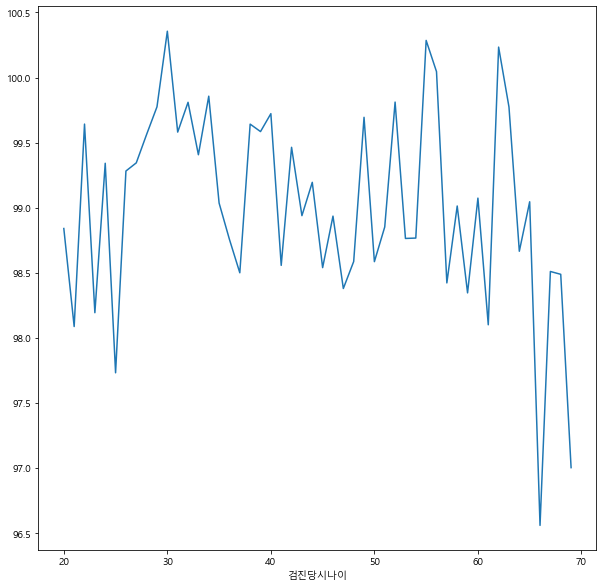

In [84]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

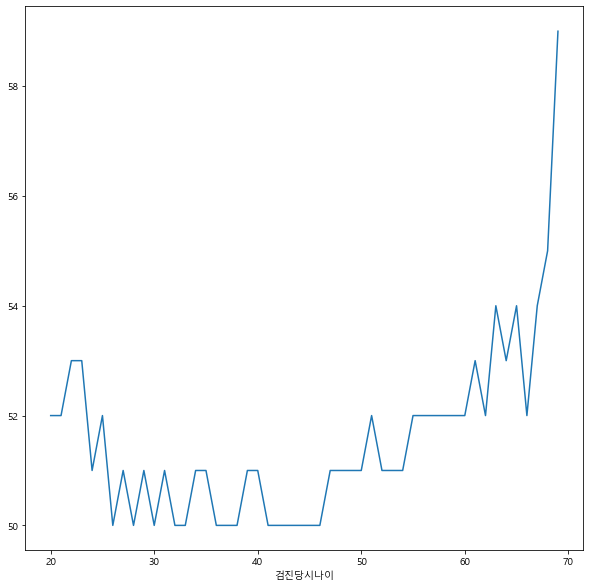

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

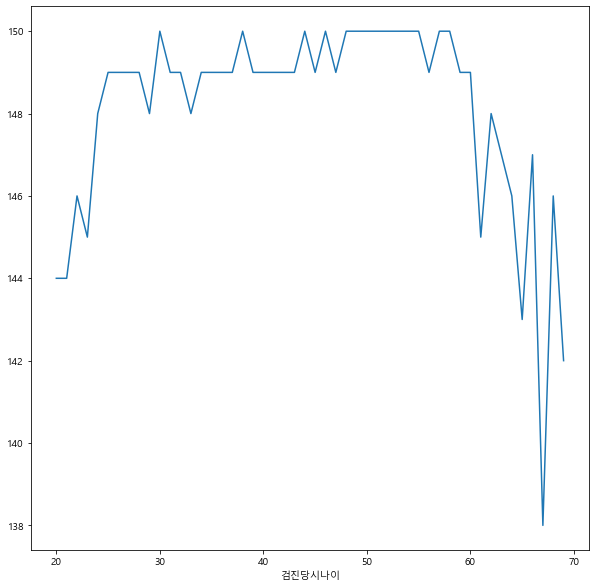

In [86]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [87]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
311122,2010,609272,143,1,40,NaN,1.00,8.8,100.0,94.81,179.94,124.92,113.0
621161,2010,585711,154,1,52,NaN,0.86,11.8,100.0,126.41,140.71,122.37,111.0
523093,2010,593983,156,1,48,NaN,1.09,16.7,100.0,57.82,25.54,61.12,81.0
284057,2010,612330,185,1,39,NaN,1.20,11.2,100.0,30.06,139.13,89.73,95.0
25114,2010,645901,212,1,28,NaN,1.10,14.8,100.0,61.47,32.16,64.54,82.0


# 결측행 제거

In [88]:
# df_result.dropna(axis=0).info()

In [89]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [90]:
df_target['SEX'].value_counts()

1    745396
2    433343
Name: SEX, dtype: int64

In [91]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

745396

In [92]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
311122,2010,609272,143,1,40,NaN,1.00,8.8,100.0,94.81,179.94,124.92,113.0
621161,2010,585711,154,1,52,NaN,0.86,11.8,100.0,126.41,140.71,122.37,111.0
523093,2010,593983,156,1,48,NaN,1.09,16.7,100.0,57.82,25.54,61.12,81.0
284057,2010,612330,185,1,39,NaN,1.20,11.2,100.0,30.06,139.13,89.73,95.0
25114,2010,645901,212,1,28,NaN,1.10,14.8,100.0,61.47,32.16,64.54,82.0


# 결측치 처리

## 결측치 삭제

In [93]:
# df_man.dropna(inplace=True)

In [94]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
311122,2010,609272,143,1,40,NaN,1.00,8.8,100.0,94.81,179.94,124.92,113.0
621161,2010,585711,154,1,52,NaN,0.86,11.8,100.0,126.41,140.71,122.37,111.0
523093,2010,593983,156,1,48,NaN,1.09,16.7,100.0,57.82,25.54,61.12,81.0
284057,2010,612330,185,1,39,NaN,1.20,11.2,100.0,30.06,139.13,89.73,95.0
25114,2010,645901,212,1,28,NaN,1.10,14.8,100.0,61.47,32.16,64.54,82.0


## 결측치 평균으로 대체

In [95]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [96]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [97]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [98]:
len(df_man)

745396

In [99]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [100]:
len(df_man)

740363

In [101]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
311122,2010,609272,143,1,40,NaN,1.00,8.8,100.0,94.81,179.94,124.92,113.0
621161,2010,585711,154,1,52,NaN,0.86,11.8,100.0,126.41,140.71,122.37,111.0
523093,2010,593983,156,1,48,NaN,1.09,16.7,100.0,57.82,25.54,61.12,81.0
284057,2010,612330,185,1,39,NaN,1.20,11.2,100.0,30.06,139.13,89.73,95.0
25114,2010,645901,212,1,28,NaN,1.10,14.8,100.0,61.47,32.16,64.54,82.0


## fillna

In [102]:
df_man.mean().round(2)

검진년도                        2021.91
UID                       514287.31
CU_REC_ID                1497947.19
SEX                            1.00
검진당시나이                        41.95
신사구체여과율 (GFR)                 91.89
크레아티닌(Creatinine)              0.97
요소질소 (BUN)                    13.24
신사구체여과율 (GFR)_kde             99.85
크레아티닌(Creatinine)_kde         96.13
요소질소 (BUN)_kde                98.13
kde_mean                      98.04
target                        99.21
dtype: float64

In [103]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [104]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [105]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [106]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 스크리닝

## 요소질소 (BUN) 스크리닝

In [107]:
screening = 10

In [108]:
df_man[df_man['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
311122,2010,609272,143,1,40,91.89,1.0,8.8,100.0,94.81,179.94,124.92,113.0
58536,2010,295306,436,1,30,91.89,0.9,9.8,100.0,117.21,174.38,130.53,116.0
41753,2010,209421,438,1,29,91.89,1.1,9.1,100.0,65.49,181.68,115.72,108.0
372060,2010,133016,452,1,42,91.89,0.9,9.6,100.0,100.76,165.67,122.14,111.0
7264,2010,403919,561,1,26,91.89,0.9,9.2,100.0,114.00,184.97,132.99,117.0


In [109]:
len(df_man[df_man['요소질소 (BUN)'] < screening])

70475

In [110]:
df_man.loc[df_man['요소질소 (BUN)'] < screening, '요소질소 (BUN)'] = screening

In [111]:
df_man[df_man['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target


In [112]:
len(df_man[df_man['요소질소 (BUN)'] < screening])

0

In [113]:
len(df_man)

740363

# 중복 제거

In [114]:
len(df_man)

740363

In [115]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [116]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
2301,2011,32,11757,1,24,91.89,1.00,15.2,100.00,100.00,28.08,76.03,88.0
644982,2019,50,356493,1,53,83.00,1.00,13.5,66.02,96.44,100.75,87.74,94.0
685451,2021,50,642497,1,55,68.00,1.20,11.9,27.92,27.65,123.66,59.74,80.0
311727,2019,62,421626,1,40,87.00,1.00,13.8,72.20,94.81,66.44,77.82,89.0
346361,2020,62,565527,1,41,78.00,1.10,13.5,39.72,58.81,86.32,61.62,81.0
377938,2021,62,699357,1,42,87.00,1.00,16.2,69.17,100.00,25.54,64.90,83.0
409929,2022,62,1356310,1,43,105.00,0.84,12.7,162.51,140.12,101.74,134.79,118.0
442017,2023,62,2170394,1,44,93.00,0.93,13.1,121.58,82.74,98.79,101.04,101.0
597682,2019,67,410099,1,51,91.89,0.92,20.9,100.00,90.65,5.68,65.44,83.0
623385,2020,67,481109,1,52,91.89,0.82,14.9,100.00,132.55,61.04,97.86,99.0


In [117]:
len(df_man)

740363

In [118]:
df_man[target_cols]

,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
2301,91.89,1.0,15.20
644982,83.00,1.0,13.50
685451,68.00,1.2,11.90
311727,87.00,1.0,13.80
346361,78.00,1.1,13.50
...,...,...,...
52722,120.00,0.8,11.40
302621,113.00,0.8,13.24
12069,117.00,0.9,15.60
657389,102.00,0.8,10.00


## first만 남겨두고 중복 제거

In [119]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [120]:
len(df_man)

627263

In [121]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
2301,2011,32,11757,1,24,91.89,1.00,15.2,100.00,100.00,28.08,76.03,88.0
644982,2019,50,356493,1,53,83.00,1.00,13.5,66.02,96.44,100.75,87.74,94.0
685451,2021,50,642497,1,55,68.00,1.20,11.9,27.92,27.65,123.66,59.74,80.0
311727,2019,62,421626,1,40,87.00,1.00,13.8,72.20,94.81,66.44,77.82,89.0
346361,2020,62,565527,1,41,78.00,1.10,13.5,39.72,58.81,86.32,61.62,81.0
377938,2021,62,699357,1,42,87.00,1.00,16.2,69.17,100.00,25.54,64.90,83.0
409929,2022,62,1356310,1,43,105.00,0.84,12.7,162.51,140.12,101.74,134.79,118.0
442017,2023,62,2170394,1,44,93.00,0.93,13.1,121.58,82.74,98.79,101.04,101.0
597682,2019,67,410099,1,51,91.89,0.92,20.9,100.00,90.65,5.68,65.44,83.0
623385,2020,67,481109,1,52,91.89,0.82,14.9,100.00,132.55,61.04,97.86,99.0


In [122]:
df_man.reset_index(drop=True, inplace=True)

In [123]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
0,2011,32,11757,1,24,91.89,1.0,15.2,100.00,100.00,28.08,76.03,88.0
1,2019,50,356493,1,53,83.00,1.0,13.5,66.02,96.44,100.75,87.74,94.0
2,2021,50,642497,1,55,68.00,1.2,11.9,27.92,27.65,123.66,59.74,80.0
3,2019,62,421626,1,40,87.00,1.0,13.8,72.20,94.81,66.44,77.82,89.0
4,2020,62,565527,1,41,78.00,1.1,13.5,39.72,58.81,86.32,61.62,81.0


In [124]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627263 entries, 0 to 627262
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   627263 non-null  int64  
 1   UID                    627263 non-null  int64  
 2   CU_REC_ID              627263 non-null  int64  
 3   SEX                    627263 non-null  int64  
 4   검진당시나이                 627263 non-null  int64  
 5   신사구체여과율 (GFR)          627263 non-null  float64
 6   크레아티닌(Creatinine)      627263 non-null  float64
 7   요소질소 (BUN)             627263 non-null  float64
 8   신사구체여과율 (GFR)_kde      627263 non-null  float64
 9   크레아티닌(Creatinine)_kde  627263 non-null  float64
 10  요소질소 (BUN)_kde         627263 non-null  float64
 11  kde_mean               627263 non-null  float64
 12  target                 627263 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 62.2 MB


# 데이터 Sampling

In [125]:
len(df_man)

627263

In [126]:
df_man['target'].min()

51.0

In [127]:
df_man['target'].max()

150.0

## 150보다 큰 data 삭제

In [128]:
# df_man.drop(df_man[df_man['target'] > 150].index, inplace=True)

## 50보다 작은 data 삭제

In [129]:
# df_man.drop(df_man[df_man['target'] < 50].index, inplace=True)

In [130]:
len(df_man)

627263

In [131]:
# df_man_sample = pd.DataFrame()

# for age in range(int(df_man['target'].min()), 100):
#     print(age, 200 - age)
#     print(len(df_man[df_man['target'] == age]), len(df_man[df_man['target'] == (200 - age)]))

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

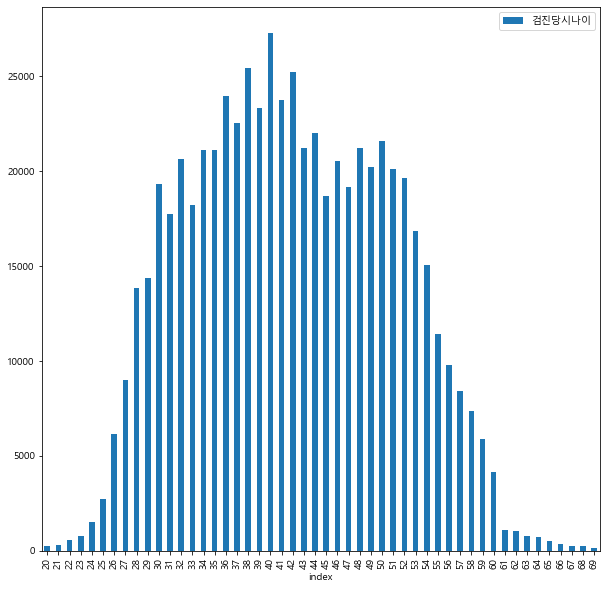

In [132]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [133]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,239
45,21,307
42,22,575
39,23,772
36,24,1484
35,25,2707
32,26,6126
29,27,8999
26,28,13826
25,29,14345


# 검진항목 시각화

In [134]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
count,627263.000000,6.272630e+05,6.272630e+05,627263.0,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000
mean,2021.852067,5.102071e+05,1.493870e+06,1.0,41.923225,92.038918,0.967719,13.355222,100.321164,96.173600,97.954557,98.149776,99.269358
std,1.758806,3.647075e+05,8.088289e+05,0.0,8.822792,14.629402,0.144994,2.496077,53.901525,41.536677,52.474912,37.088914,18.650255
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,47.000000,0.270000,10.000000,0.010000,0.460000,1.100000,1.720000,51.000000
25%,2021.000000,2.224700e+05,6.608725e+05,1.0,35.000000,82.800000,0.880000,11.400000,48.470000,64.220000,48.030000,70.520000,85.000000
50%,2022.000000,3.816760e+05,1.418114e+06,1.0,41.000000,91.890000,0.970000,13.240000,100.000000,100.000000,100.000000,97.860000,99.000000
75%,2023.000000,8.385235e+05,2.191484e+06,1.0,49.000000,100.000000,1.090000,14.900000,156.720000,123.760000,141.980000,124.990000,113.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,147.000000,1.450000,21.030000,200.000000,200.000000,200.000000,199.050000,150.000000


<AxesSubplot:xlabel='검진당시나이'>

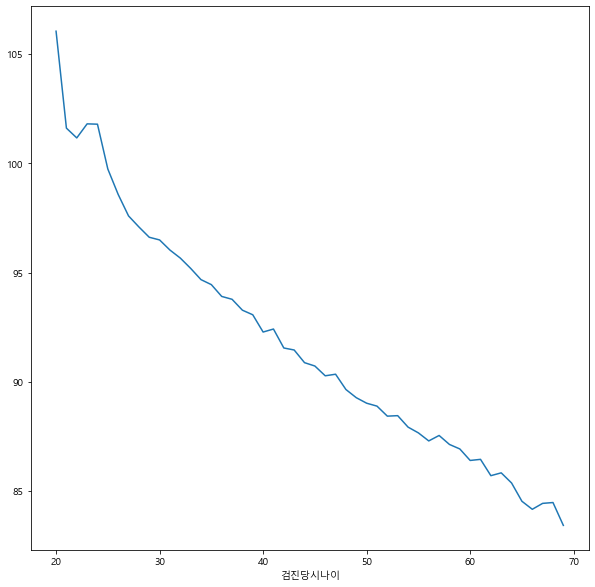

In [135]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

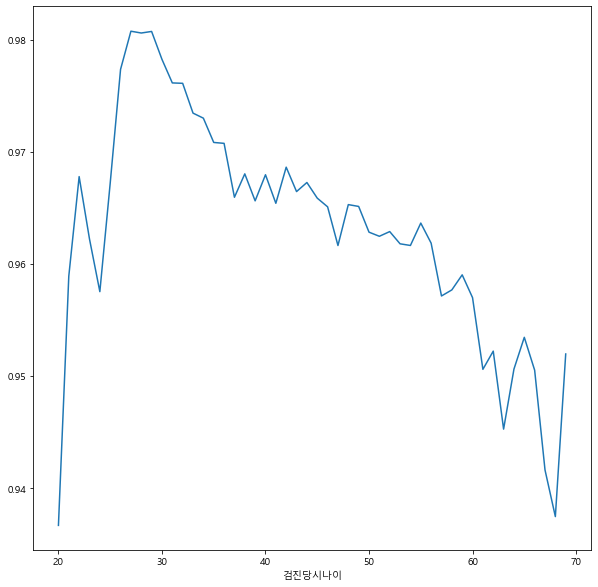

In [136]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

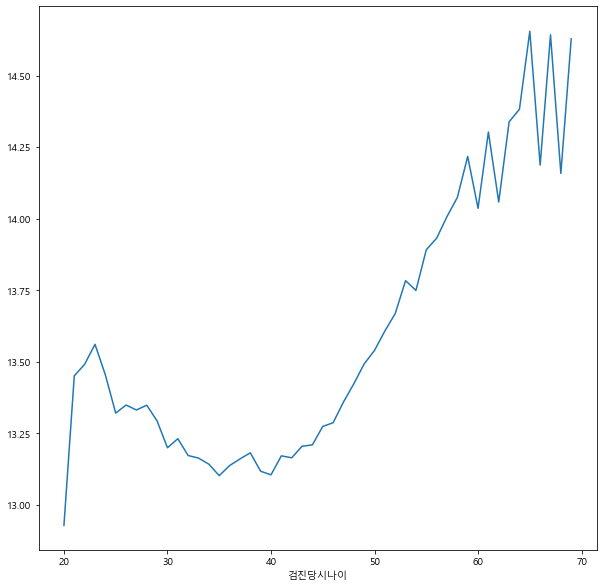

In [137]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

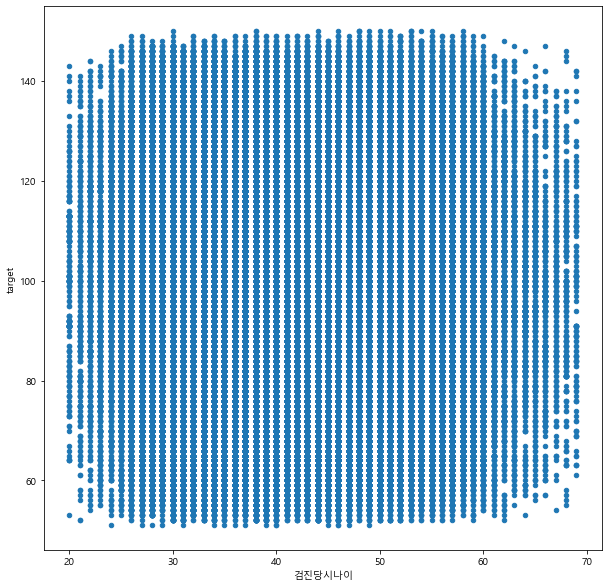

In [138]:
df_man.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

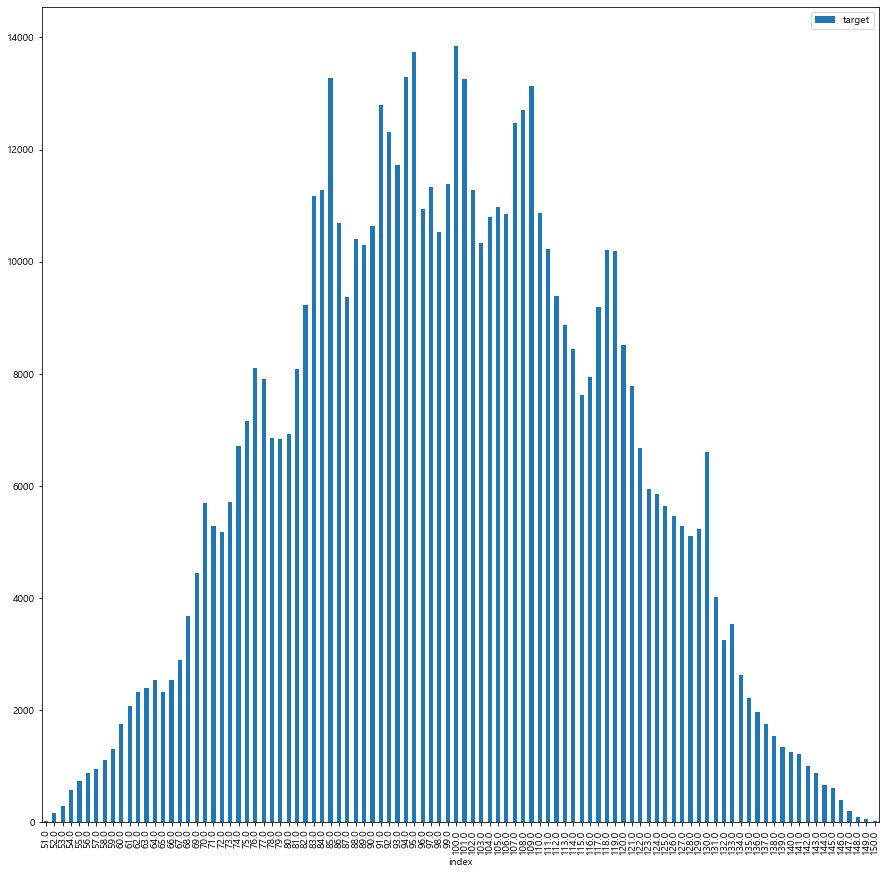

In [139]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [140]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,17
95,52.0,170
93,53.0,289
91,54.0,575
88,55.0,738
86,56.0,886
85,57.0,958
83,58.0,1114
80,59.0,1311
77,60.0,1752


# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

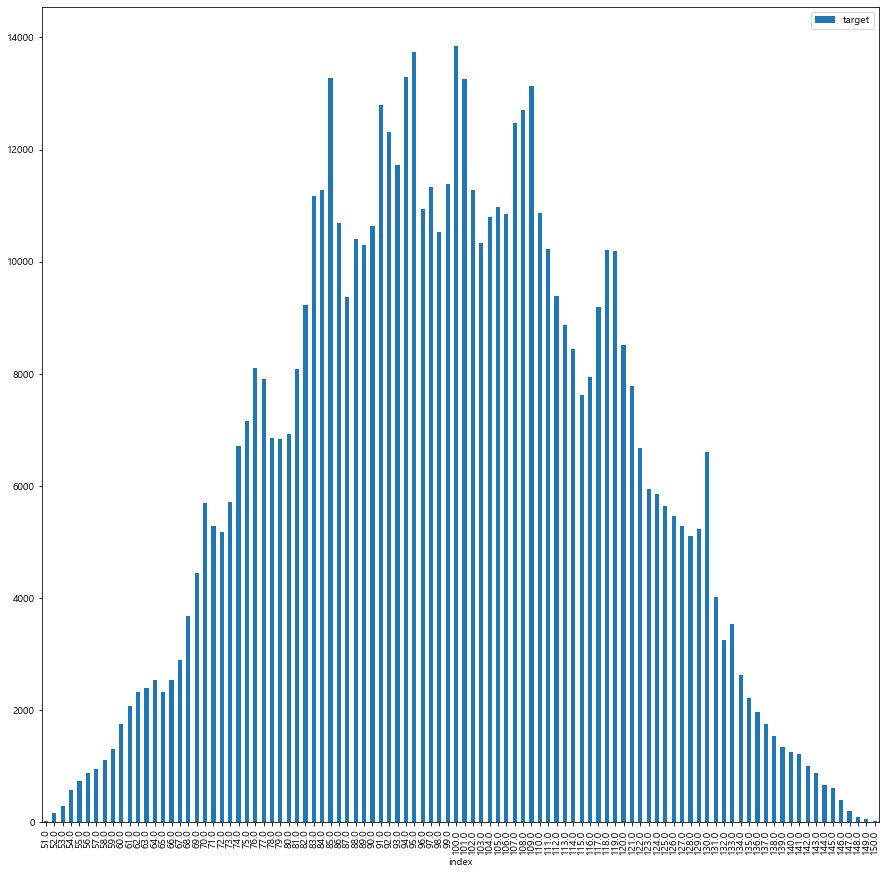

In [141]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [142]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,17
95,52.0,170
93,53.0,289
91,54.0,575
88,55.0,738
86,56.0,886
85,57.0,958
83,58.0,1114
80,59.0,1311
77,60.0,1752


In [143]:
df_man_sampling = pd.DataFrame()

for target in range(int(df_man['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [144]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

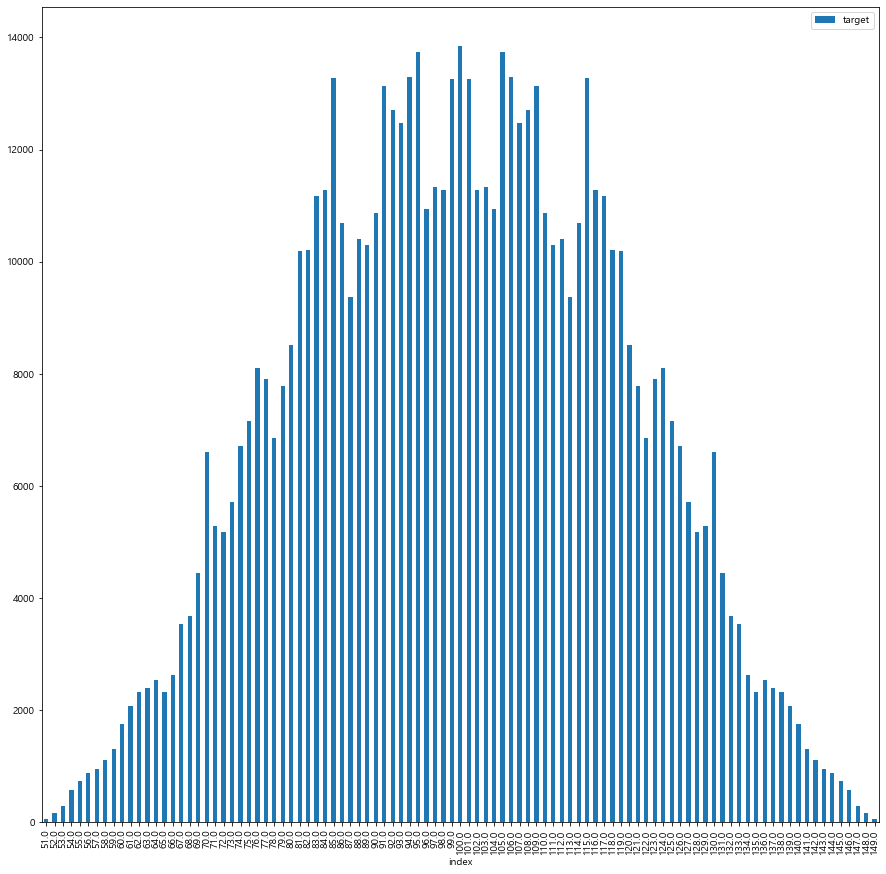

In [145]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [146]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
98,51.0,51
95,52.0,170
93,53.0,289
92,54.0,575
90,55.0,738
88,56.0,886
86,57.0,958
83,58.0,1114
82,59.0,1311
80,60.0,1752


# 나이별 확인하기

In [147]:
target = 'target'

In [148]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [149]:
# df_man = df_man_sample

In [150]:
# int(df_man['검진당시나이'].value_counts().mean())

In [151]:
# df_man['검진당시나이'].min()

In [152]:
# df_man['검진당시나이'].max()

In [153]:
# df_man.columns

In [154]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [155]:
# df_temp.info()

In [156]:
# df_temp.reset_index(drop=True, inplace=True)

In [157]:
# df_man = df_temp.copy()

In [158]:
# df_man['검진당시나이'].value_counts()

In [159]:
# df_man[df_man['검진당시나이']==38]

In [160]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [161]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '신사구체여과율 (GFR)',
       '크레아티닌(Creatinine)', '요소질소 (BUN)', '신사구체여과율 (GFR)_kde',
       '크레아티닌(Creatinine)_kde', '요소질소 (BUN)_kde', 'kde_mean', 'target'],
      dtype='object')

In [162]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [163]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [164]:
train_columns = target_cols

In [165]:
target_col = 'target'

## Min Max Scaling

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_man[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [168]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [169]:
# model = LinearRegression()

In [170]:
# model.fit(X_train, y_train)

In [171]:
# model.intercept_

In [172]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [173]:
# model = XGBRegressor()

In [174]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [175]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [176]:
# import time
# start = time.time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [177]:
# # best parameter
# random_search.best_params_

In [178]:
# # best score
# random_search.best_score_

In [179]:
# model = random_search.best_estimator_
# model

## Keras

In [180]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [181]:
# model = build_model()

In [182]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [183]:
# model.summary()

In [184]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [185]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [186]:
# plot_history(history)

## pyTorch 신경망

In [187]:
np.shape(X_train)[1]

3

In [188]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(np.shape(X_train)[1], 512) #첫 번째 레이어 
        self.fc2 = nn.Linear(512, 128) #두 번째 레이어
        self.fc3 = nn.Linear(128, 16) #세 번째 레이어
        self.fc4 = nn.Linear(16, 1) #출력 레이어 
#         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
#         self.relu = nn.ReLU()
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #활성화 함수 적용                 
#         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
        x = F.relu(self.fc2(x)) #활성화 함수 적용 
        x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
        x = self.fc4(x)
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.relu(x)
        return x

In [189]:
model = Regressor()
reg_loss = nn.MSELoss()
# reg_loss = nn.L1Loss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), momentum=0.9)
# optimizer = optim.SGD(model.parameters())

In [190]:
# epochs = 5000

In [191]:
X_train  = torch.Tensor(X_train.to_numpy())
X_test  = torch.Tensor(X_test.to_numpy())
y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [192]:
import time
start = time.time()

losses = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
    loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 50번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses.append(loss.item())

end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/400 Cost: 10387.335938
Epoch   10/400 Cost: 10124.275391
Epoch   20/400 Cost: 9563.183594
Epoch   30/400 Cost: 8478.358398
Epoch   40/400 Cost: 6665.156738
Epoch   50/400 Cost: 4143.236816
Epoch   60/400 Cost: 1612.799683
Epoch   70/400 Cost: 556.078064
Epoch   80/400 Cost: 654.752930
Epoch   90/400 Cost: 474.342804
Epoch  100/400 Cost: 420.698212
Epoch  110/400 Cost: 371.234833
Epoch  120/400 Cost: 325.766266
Epoch  130/400 Cost: 288.949585
Epoch  140/400 Cost: 253.581604
Epoch  150/400 Cost: 222.670731
Epoch  160/400 Cost: 194.356598
Epoch  170/400 Cost: 168.607971
Epoch  180/400 Cost: 145.253525
Epoch  190/400 Cost: 124.493095
Epoch  200/400 Cost: 106.357590
Epoch  210/400 Cost: 90.814667
Epoch  220/400 Cost: 77.806000
Epoch  230/400 Cost: 67.235031
Epoch  240/400 Cost: 58.960602
Epoch  250/400 Cost: 52.734264
Epoch  260/400 Cost: 48.167755
Epoch  270/400 Cost: 44.805782
Epoch  280/400 Cost: 42.327301
Epoch  290/400 Cost: 40.444973
Epoch  300/400 Cost: 38.948929
Epoch  31

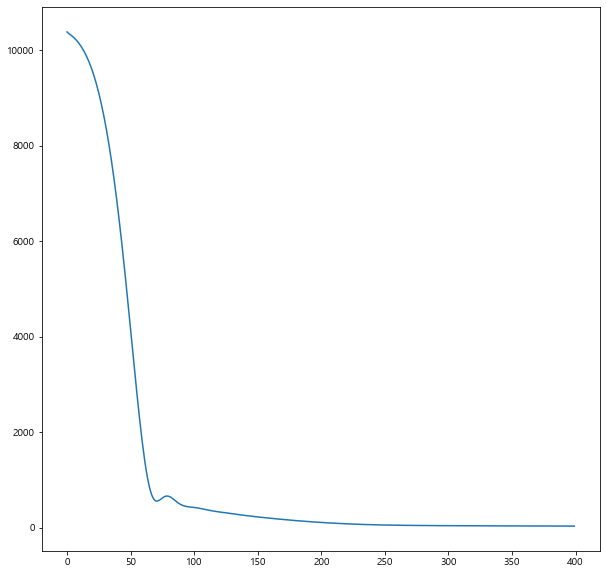

In [193]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(losses)

## coef 계산

In [194]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [195]:
# df_coef.columns = ['검사항목', 'coef']

In [196]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [197]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [198]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [199]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [200]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [201]:
# slr = LinearRegression()

In [202]:
# slr.fit(X_train_poly, y_train)

In [203]:
# np.shape(X_train)

In [204]:
# np.shape(X_train_poly)

In [205]:
# np.shape(X_test)

In [206]:
# np.shape(X_test_poly)

In [207]:
# y_pred_poly = slr.predict(X_test_poly)

In [208]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [209]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [210]:
# model_path = './model/03/11/20/best_estimator.pkl'

In [211]:
# import pickle
# with open(model_path,'wb') as f:
#     pickle.dump(model, f)

In [212]:
# with open(model_path, 'rb') as f:
#     model = pickle.load(f) 

In [213]:
# Get predictions
# y_pred = model.predict(X_test)

# 성능 평가

## pyTorch 예측

In [214]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [215]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [216]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 4.2750845
MSE : 30.444267
RMSE : 5.5176325


In [217]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9141326310827818

In [218]:
if XGB_bool:
    model.score(X_test, y_test)

## feature importance

In [219]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model)

# 실제지수 - 예측지수 결과

In [220]:
pd.DataFrame(y_test).reset_index(drop=True)

,0
0,83.0
1,95.0
2,91.0
3,92.0
4,104.0
...,...
168224,122.0
168225,70.0
168226,134.0
168227,109.0


In [221]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,81.536987
1,93.722382
2,84.035095
3,91.454651
4,105.365768
...,...
168224,128.203186
168225,70.565689
168226,141.545120
168227,100.725067


In [222]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [223]:
df_test.head()

,0,0
0,83.0,81.536987
1,95.0,93.722382
2,91.0,84.035095
3,92.0,91.454651
4,104.0,105.365768


In [224]:
df_test.columns

Int64Index([0, 0], dtype='int64')

In [225]:
df_test.columns = ['실제지수', '예측지수']

In [226]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [227]:
df_test.head()

,실제지수,예측지수,diff
0,83.0,81.536987,-1.463013
1,95.0,93.722382,-1.277618
2,91.0,84.035095,-6.964905
3,92.0,91.454651,-0.545349
4,104.0,105.365768,1.365768


In [228]:
df_test['diff_int'] = df_test['diff'].round(0)

In [229]:
len(df_test)

168229

In [230]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,83.0,81.536987,-1.463013,-1.0
1,95.0,93.722382,-1.277618,-1.0
2,91.0,84.035095,-6.964905,-7.0
3,92.0,91.454651,-0.545349,-1.0
4,104.0,105.365768,1.365768,1.0


<AxesSubplot:>

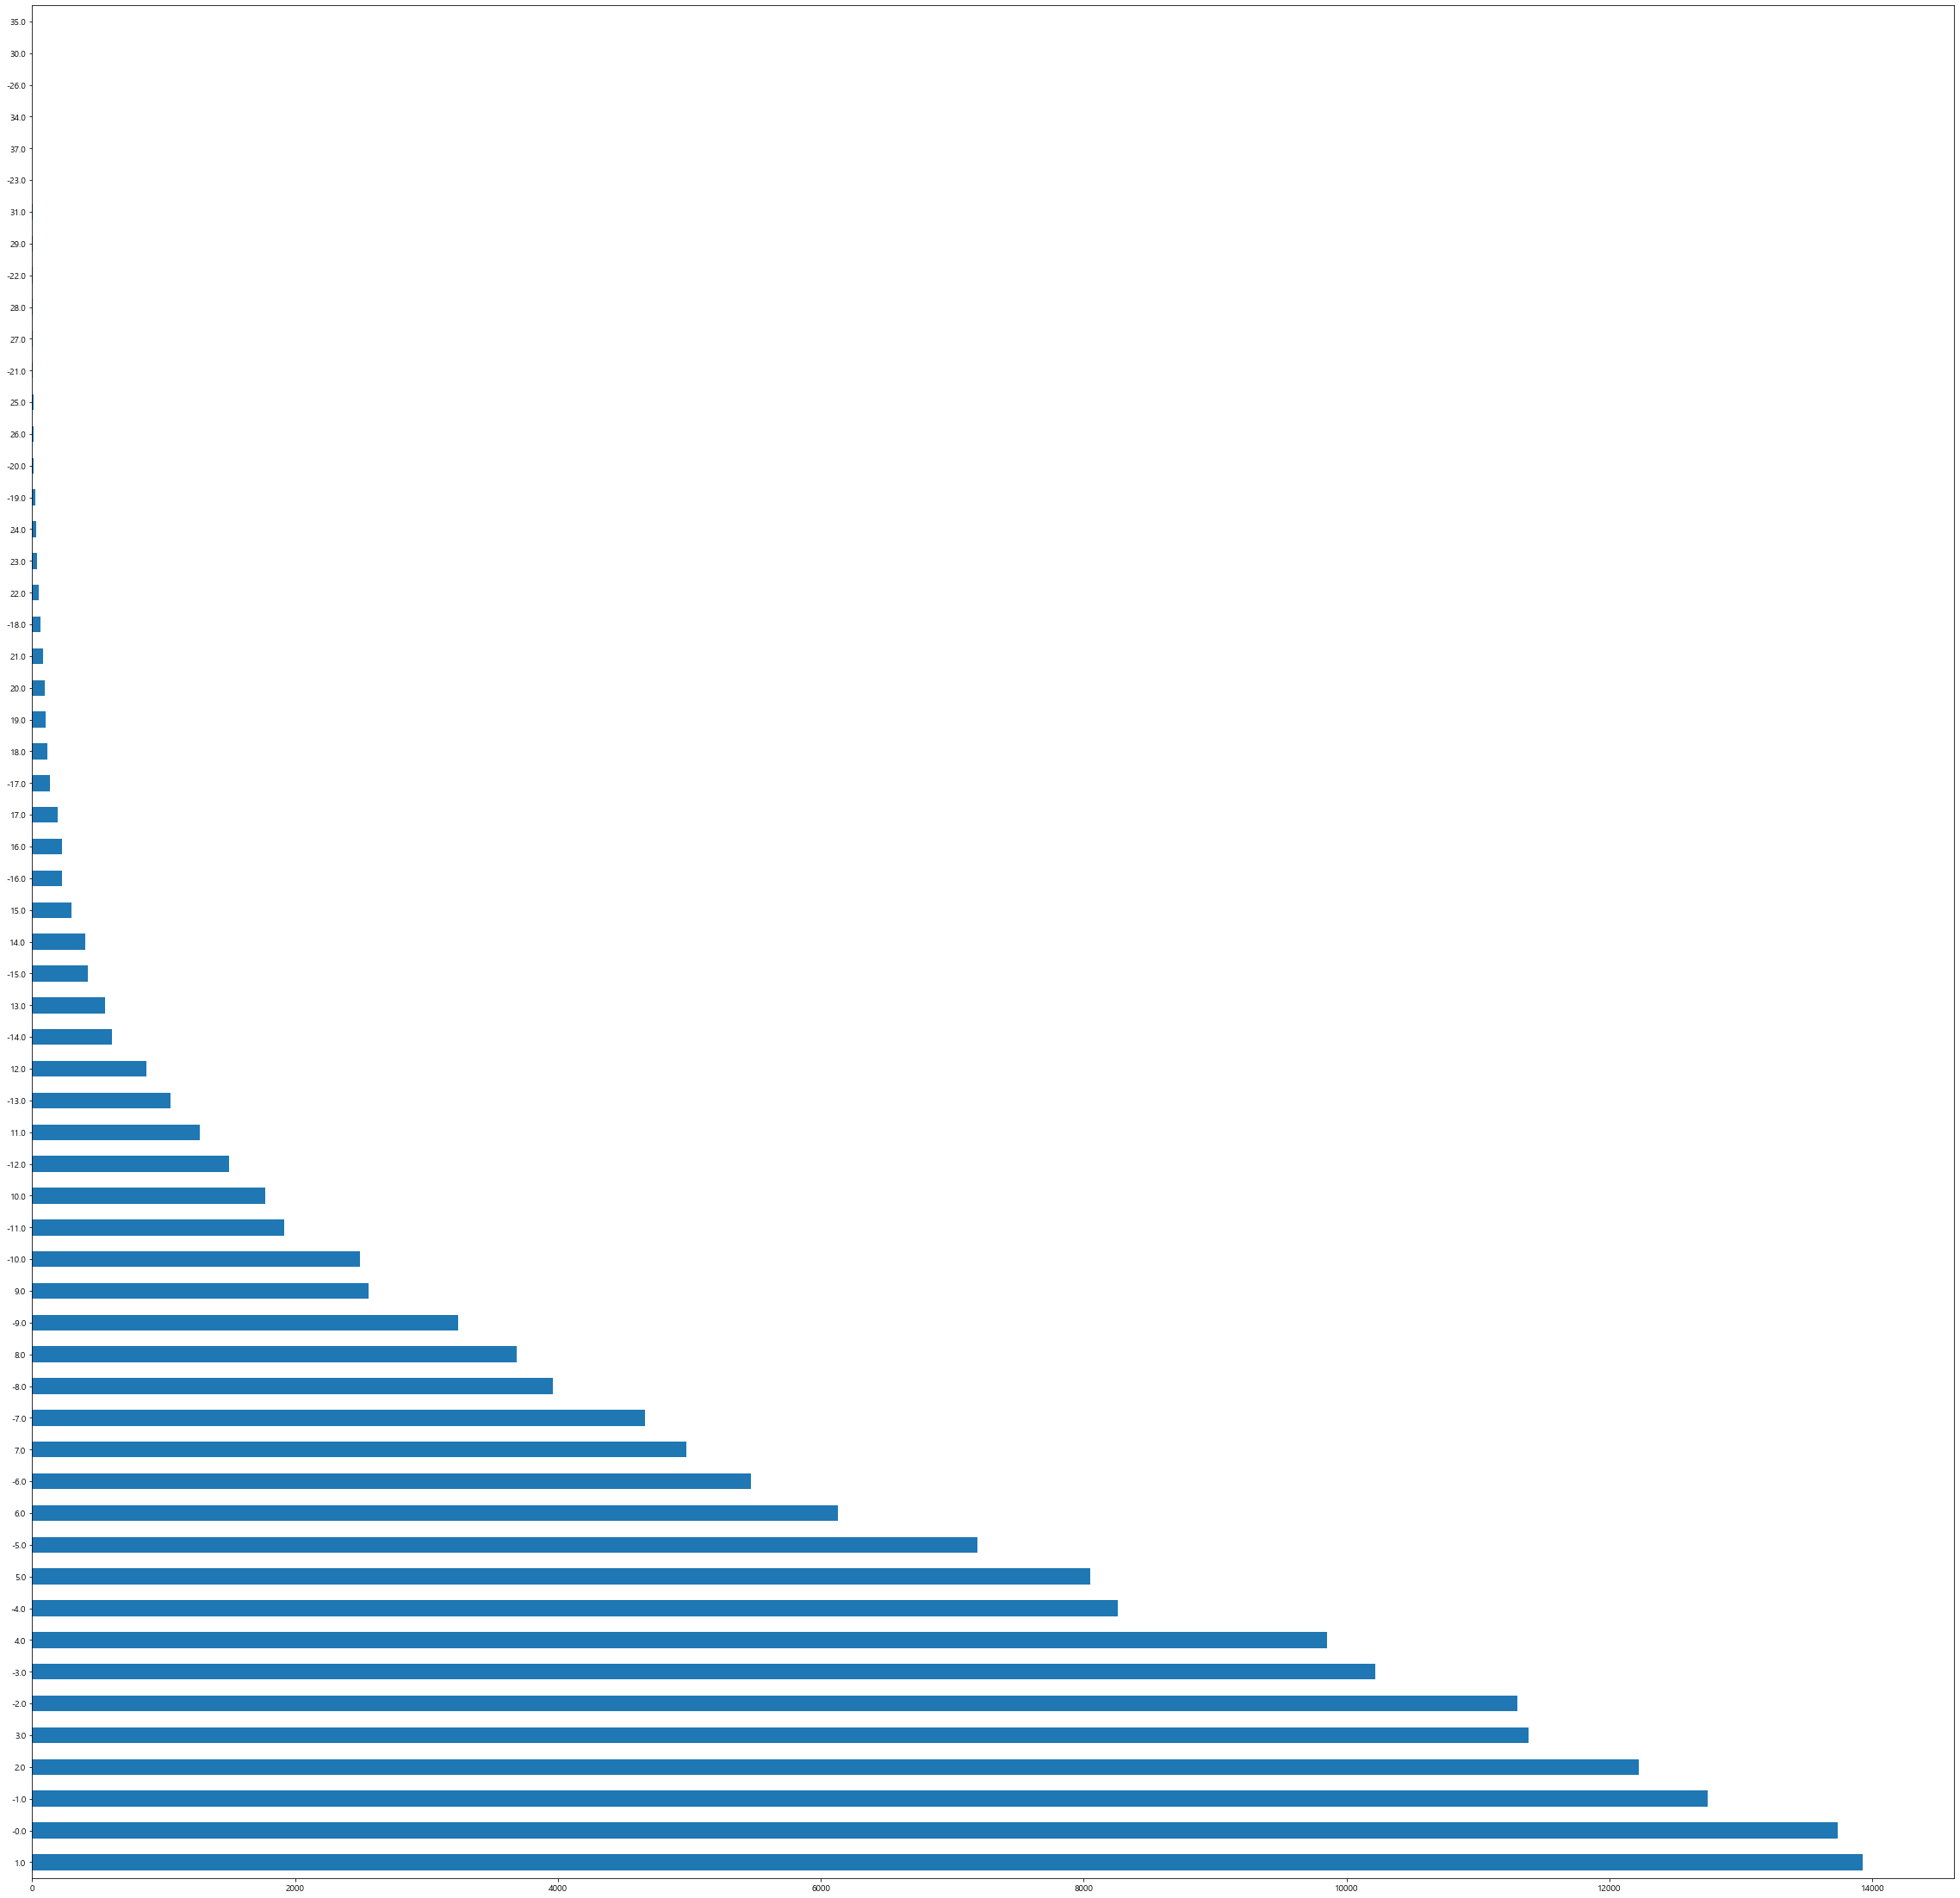

In [231]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [232]:
df_test['diff_int'].value_counts(ascending=False)

 1.0     13925
-0.0     13733
-1.0     12749
 2.0     12225
 3.0     11386
-2.0     11299
-3.0     10217
 4.0      9849
-4.0      8260
 5.0      8047
-5.0      7191
 6.0      6127
-6.0      5467
 7.0      4978
-7.0      4666
-8.0      3964
 8.0      3689
-9.0      3240
 9.0      2562
-10.0     2495
-11.0     1920
 10.0     1772
-12.0     1499
 11.0     1275
-13.0     1056
 12.0      870
-14.0      609
 13.0      555
-15.0      427
 14.0      406
 15.0      299
-16.0      231
 16.0      227
 17.0      198
-17.0      137
 18.0      116
 19.0      104
 20.0       97
 21.0       87
-18.0       63
 22.0       51
 23.0       41
 24.0       30
-19.0       22
-20.0       14
 26.0       11
 25.0        9
-21.0        7
 27.0        6
 28.0        5
-22.0        4
 29.0        3
 31.0        3
-23.0        1
 37.0        1
 34.0        1
-26.0        1
 30.0        1
 35.0        1
Name: diff_int, dtype: int64

In [233]:
df_test['예측지수'].round(0).value_counts()

105.0    3799
101.0    3795
99.0     3776
94.0     3617
103.0    3576
112.0    3482
104.0    3469
107.0    3417
97.0     3413
111.0    3386
102.0    3361
98.0     3350
95.0     3342
100.0    3321
109.0    3318
93.0     3313
96.0     3294
92.0     3238
90.0     3198
106.0    3198
91.0     3183
114.0    3087
108.0    3020
88.0     3010
89.0     2977
85.0     2943
110.0    2894
83.0     2890
86.0     2831
87.0     2812
84.0     2729
81.0     2628
113.0    2618
115.0    2423
82.0     2352
80.0     2189
79.0     2103
78.0     2037
116.0    2026
77.0     1991
117.0    1980
118.0    1825
76.0     1704
74.0     1673
120.0    1660
119.0    1651
75.0     1640
73.0     1608
122.0    1561
72.0     1534
121.0    1525
124.0    1429
70.0     1417
71.0     1406
123.0    1406
125.0    1339
69.0     1297
68.0     1168
129.0    1164
126.0    1127
127.0    1067
128.0    1044
67.0      983
130.0     909
131.0     884
132.0     873
66.0      786
65.0      752
133.0     731
134.0     693
64.0      621
135.0 

# 예측 나이 분포

In [234]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [235]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [236]:
df_train.round(0).value_counts()

99.0     11284
105.0    11273
101.0    11265
94.0     10921
103.0    10822
104.0    10698
97.0     10579
112.0    10521
109.0    10369
93.0     10331
95.0     10249
107.0    10130
111.0    10064
100.0    10031
102.0    10015
98.0      9861
96.0      9848
91.0      9521
106.0     9510
92.0      9449
90.0      9327
89.0      9231
114.0     9198
108.0     9051
110.0     9003
83.0      8772
88.0      8730
85.0      8585
86.0      8509
87.0      8320
84.0      8147
113.0     8029
81.0      7790
115.0     7108
82.0      6994
80.0      6651
79.0      6351
116.0     6148
77.0      6086
78.0      6040
117.0     5769
118.0     5378
76.0      5202
74.0      5121
119.0     5097
75.0      4899
120.0     4821
122.0     4532
73.0      4522
72.0      4516
121.0     4500
123.0     4396
124.0     4231
70.0      4203
71.0      4118
125.0     3970
69.0      3807
68.0      3573
126.0     3571
127.0     3438
129.0     3402
128.0     3325
67.0      2949
131.0     2743
130.0     2716
132.0     2483
66.0      

In [237]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [238]:
y_test.value_counts()

95.0     3457
100.0    3431
105.0    3405
85.0     3331
101.0    3328
106.0    3324
91.0     3307
115.0    3305
99.0     3297
109.0    3292
108.0    3245
94.0     3239
92.0     3218
93.0     3144
107.0    3030
103.0    2892
84.0     2890
98.0     2831
102.0    2824
117.0    2807
116.0    2779
104.0    2777
83.0     2770
97.0     2760
110.0    2758
90.0     2743
96.0     2687
86.0     2683
88.0     2636
112.0    2612
114.0    2611
81.0     2606
82.0     2598
111.0    2598
118.0    2573
89.0     2559
119.0    2484
113.0    2343
87.0     2331
80.0     2108
120.0    2104
76.0     2023
123.0    2005
124.0    1964
77.0     1941
79.0     1905
121.0    1875
75.0     1831
125.0    1746
78.0     1703
122.0    1694
74.0     1661
130.0    1646
126.0    1646
70.0     1640
127.0    1455
73.0     1425
129.0    1359
71.0     1351
128.0    1339
72.0     1262
69.0     1152
131.0    1115
68.0      914
132.0     909
133.0     899
67.0      875
66.0      677
134.0     663
63.0      639
64.0      638
136.0 

In [239]:
df_plot = pd.DataFrame(y_test.value_counts())

In [240]:
df_plot.columns = ['count']

In [241]:
df_plot.reset_index(inplace=True)

In [242]:
df_plot = df_plot.sort_values(0, ascending=True)

In [243]:
df_plot.columns = ['index', 'count']

In [244]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

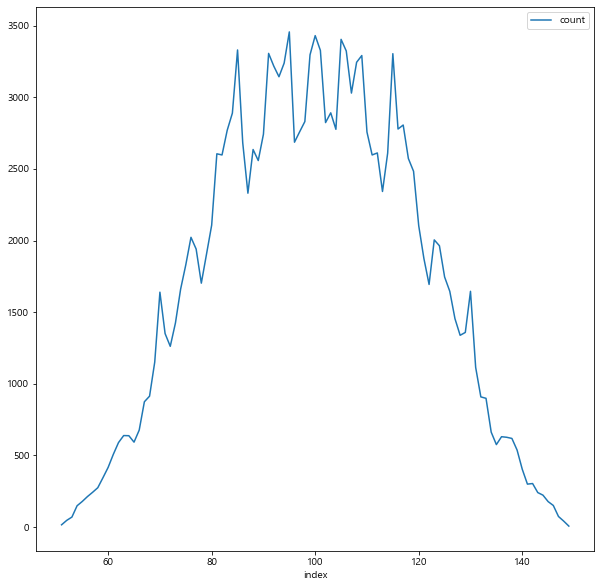

In [245]:
df_plot.plot()

In [246]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [247]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [248]:
df_test.round(0).value_counts()

105.0    3799
101.0    3795
99.0     3776
94.0     3617
103.0    3576
112.0    3482
104.0    3469
107.0    3417
97.0     3413
111.0    3386
102.0    3361
98.0     3350
95.0     3342
100.0    3321
109.0    3318
93.0     3313
96.0     3294
92.0     3238
106.0    3198
90.0     3198
91.0     3183
114.0    3087
108.0    3020
88.0     3010
89.0     2977
85.0     2943
110.0    2894
83.0     2890
86.0     2831
87.0     2812
84.0     2729
81.0     2628
113.0    2618
115.0    2423
82.0     2352
80.0     2189
79.0     2103
78.0     2037
116.0    2026
77.0     1991
117.0    1980
118.0    1825
76.0     1704
74.0     1673
120.0    1660
119.0    1651
75.0     1640
73.0     1608
122.0    1561
72.0     1534
121.0    1525
124.0    1429
70.0     1417
123.0    1406
71.0     1406
125.0    1339
69.0     1297
68.0     1168
129.0    1164
126.0    1127
127.0    1067
128.0    1044
67.0      983
130.0     909
131.0     884
132.0     873
66.0      786
65.0      752
133.0     731
134.0     693
64.0      621
135.0 

In [249]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [250]:
df_plot.columns = ['count']

In [251]:
df_plot.reset_index(inplace=True)

In [252]:
df_plot = df_plot.sort_values(0, ascending=True)

In [253]:
df_plot.set_index(0, inplace=True)

In [254]:
df_plot

,count
0,
60.0,30
61.0,130
62.0,239
63.0,441
64.0,621
65.0,752
66.0,786
67.0,983
68.0,1168


<AxesSubplot:xlabel='0'>

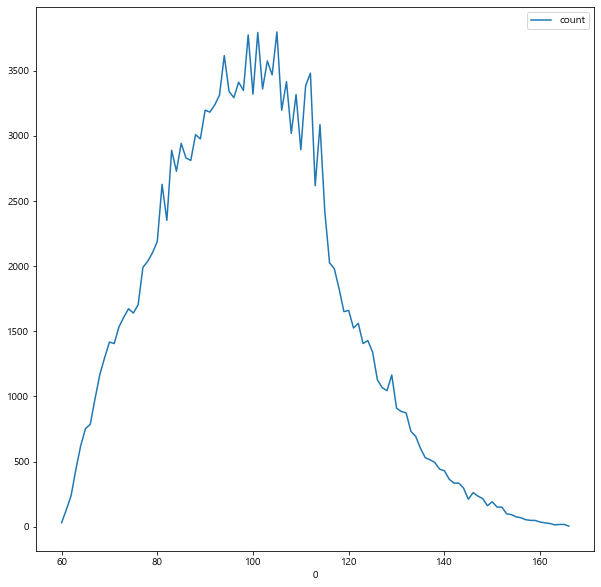

In [255]:
df_plot.plot()

# 시각화

In [256]:
# model.coef_

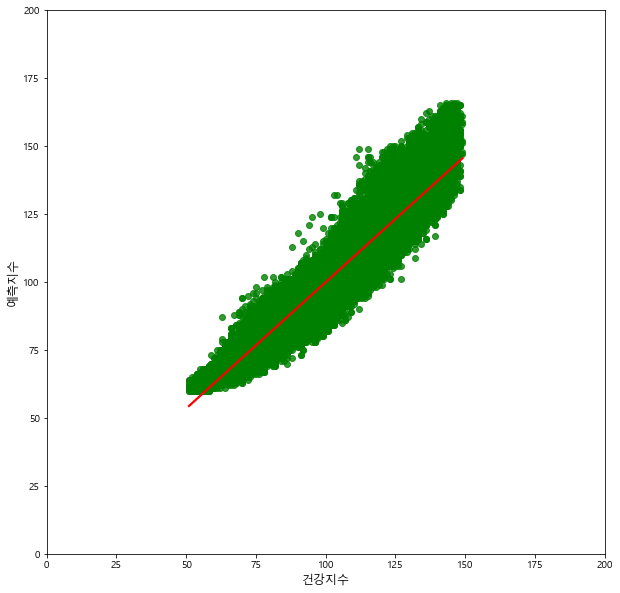

In [257]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 남성 데이터 전체 계산

In [258]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
0,2011,32,11757,1,24,91.89,1.0,15.2,100.00,100.00,28.08,76.03,88.0
1,2019,50,356493,1,53,83.00,1.0,13.5,66.02,96.44,100.75,87.74,94.0
2,2021,50,642497,1,55,68.00,1.2,11.9,27.92,27.65,123.66,59.74,80.0
3,2019,62,421626,1,40,87.00,1.0,13.8,72.20,94.81,66.44,77.82,89.0
4,2020,62,565527,1,41,78.00,1.1,13.5,39.72,58.81,86.32,61.62,81.0


In [259]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627263 entries, 0 to 627262
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   627263 non-null  int64  
 1   UID                    627263 non-null  int64  
 2   CU_REC_ID              627263 non-null  int64  
 3   SEX                    627263 non-null  int64  
 4   검진당시나이                 627263 non-null  int64  
 5   신사구체여과율 (GFR)          627263 non-null  float64
 6   크레아티닌(Creatinine)      627263 non-null  float64
 7   요소질소 (BUN)             627263 non-null  float64
 8   신사구체여과율 (GFR)_kde      627263 non-null  float64
 9   크레아티닌(Creatinine)_kde  627263 non-null  float64
 10  요소질소 (BUN)_kde         627263 non-null  float64
 11  kde_mean               627263 non-null  float64
 12  target                 627263 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 62.2 MB


In [260]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
97077,2022,168996,2259500,1,35,76.0,1.1,10.1,34.70,65.93,157.30,85.98,93.0
97078,2023,168996,2259499,1,36,76.0,1.1,13.2,35.36,62.26,96.13,64.58,82.0
97079,2024,168996,2281994,1,37,86.0,1.1,12.6,48.21,53.99,106.38,69.53,85.0


In [261]:
train_columns

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [262]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [263]:
len(df_pred)

627263

In [264]:
df_pred.reset_index(drop=True, inplace=True)

In [265]:
X_test

tensor([[0.1773, 0.7826, 0.0997],
        [0.4333, 0.5217, 0.4442],
        [0.4755, 0.5478, 0.8976],
        ...,
        [0.7738, 0.4087, 0.0725],
        [0.3624, 0.6000, 0.0907],
        [0.4333, 0.4174, 0.3626]])

In [266]:
df_pred.columns

Index(['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)'], dtype='object')

In [267]:
df_pred[train_columns]

,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
0,0.4489,0.618644,0.471442
1,0.3600,0.618644,0.317316
2,0.2100,0.788136,0.172257
3,0.4000,0.618644,0.344515
4,0.3100,0.703390,0.317316
...,...,...,...
627258,0.7300,0.449153,0.126927
627259,0.6600,0.449153,0.293744
627260,0.7000,0.533898,0.507706
627261,0.5500,0.449153,0.000000


In [268]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [269]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [270]:
pred_data = pred_data.round(0)

In [271]:
pred_data

array([[ 92.],
       [ 90.],
       [ 81.],
       ...,
       [115.],
       [124.],
       [107.]], dtype=float32)

In [272]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [273]:
df_output

,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),예측지수
0,0.4489,0.618644,0.471442,92.0
1,0.3600,0.618644,0.317316,90.0
2,0.2100,0.788136,0.172257,81.0
3,0.4000,0.618644,0.344515,93.0
4,0.3100,0.703390,0.317316,84.0
...,...,...,...,...
627258,0.7300,0.449153,0.126927,135.0
627259,0.6600,0.449153,0.293744,121.0
627260,0.7000,0.533898,0.507706,115.0
627261,0.5500,0.449153,0.000000,124.0


In [274]:
if scaling_bool:
#     df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)
#     df_output = pd.concat([df_man, df_output], axis=1)
    df_output = pd.concat([df_man, df_output['예측지수']], axis=1)

In [275]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,91.89,1.00,15.2,100.00,100.00,28.08,76.03,88.0,92.0
1,2019,50,356493,1,53,83.00,1.00,13.5,66.02,96.44,100.75,87.74,94.0,90.0
2,2021,50,642497,1,55,68.00,1.20,11.9,27.92,27.65,123.66,59.74,80.0,81.0
3,2019,62,421626,1,40,87.00,1.00,13.8,72.20,94.81,66.44,77.82,89.0,93.0
4,2020,62,565527,1,41,78.00,1.10,13.5,39.72,58.81,86.32,61.62,81.0,84.0
5,2021,62,699357,1,42,87.00,1.00,16.2,69.17,100.00,25.54,64.90,83.0,84.0
6,2022,62,1356310,1,43,105.00,0.84,12.7,162.51,140.12,101.74,134.79,118.0,116.0
7,2023,62,2170394,1,44,93.00,0.93,13.1,121.58,82.74,98.79,101.04,101.0,102.0
8,2019,67,410099,1,51,91.89,0.92,20.9,100.00,90.65,5.68,65.44,83.0,81.0
9,2020,67,481109,1,52,91.89,0.82,14.9,100.00,132.55,61.04,97.86,99.0,96.0


## 예측지수 성능평가

In [276]:
df_output.isnull().sum()

검진년도                     0
UID                      0
CU_REC_ID                0
SEX                      0
검진당시나이                   0
신사구체여과율 (GFR)            0
크레아티닌(Creatinine)        0
요소질소 (BUN)               0
신사구체여과율 (GFR)_kde        0
크레아티닌(Creatinine)_kde    0
요소질소 (BUN)_kde           0
kde_mean                 0
target                   0
예측지수                     0
dtype: int64

In [277]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

4.359665722352506

# target으로 나이 계산

In [278]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [279]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,91.890000,1.00,15.2,100.00,100.00,28.08,76.03,88.0,92.0,25.6
1,2019,50,356493,1,53,83.000000,1.00,13.5,66.02,96.44,100.75,87.74,94.0,90.0,55.0
2,2021,50,642497,1,55,68.000000,1.20,11.9,27.92,27.65,123.66,59.74,80.0,81.0,58.8
3,2019,62,421626,1,40,87.000000,1.00,13.8,72.20,94.81,66.44,77.82,89.0,93.0,41.4
4,2020,62,565527,1,41,78.000000,1.10,13.5,39.72,58.81,86.32,61.62,81.0,84.0,44.2
5,2021,62,699357,1,42,87.000000,1.00,16.2,69.17,100.00,25.54,64.90,83.0,84.0,45.2
6,2022,62,1356310,1,43,105.000000,0.84,12.7,162.51,140.12,101.74,134.79,118.0,116.0,39.8
7,2023,62,2170394,1,44,93.000000,0.93,13.1,121.58,82.74,98.79,101.04,101.0,102.0,43.6
8,2019,67,410099,1,51,91.890000,0.92,20.9,100.00,90.65,5.68,65.44,83.0,81.0,54.8
9,2020,67,481109,1,52,91.890000,0.82,14.9,100.00,132.55,61.04,97.86,99.0,96.0,52.8


## 예측나이 성능평가

In [280]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.874441502208803

# 최종 산출

In [281]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,91.89,1.0,15.2,100.00,100.00,28.08,76.03,88.0,92.0,25.6
1,2019,50,356493,1,53,83.00,1.0,13.5,66.02,96.44,100.75,87.74,94.0,90.0,55.0
2,2021,50,642497,1,55,68.00,1.2,11.9,27.92,27.65,123.66,59.74,80.0,81.0,58.8
3,2019,62,421626,1,40,87.00,1.0,13.8,72.20,94.81,66.44,77.82,89.0,93.0,41.4
4,2020,62,565527,1,41,78.00,1.1,13.5,39.72,58.81,86.32,61.62,81.0,84.0,44.2


In [282]:
# df_output.to_csv('man.csv')

# 최종 UID별 확인

In [283]:
df_output

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,91.89,1.0,15.20,100.00,100.00,28.08,76.03,88.0,92.0,25.6
1,2019,50,356493,1,53,83.00,1.0,13.50,66.02,96.44,100.75,87.74,94.0,90.0,55.0
2,2021,50,642497,1,55,68.00,1.2,11.90,27.92,27.65,123.66,59.74,80.0,81.0,58.8
3,2019,62,421626,1,40,87.00,1.0,13.80,72.20,94.81,66.44,77.82,89.0,93.0,41.4
4,2020,62,565527,1,41,78.00,1.1,13.50,39.72,58.81,86.32,61.62,81.0,84.0,44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627258,2024,1473554,2870504,1,29,120.00,0.8,11.40,174.43,149.92,152.28,158.88,130.0,135.0,22.0
627259,2024,1473563,2870572,1,39,113.00,0.8,13.24,173.76,141.84,100.00,138.53,120.0,121.0,34.8
627260,2024,1473599,2870970,1,26,117.00,0.9,15.60,170.67,114.00,24.33,103.00,102.0,115.0,23.0
627261,2024,1473602,2870997,1,53,102.00,0.8,10.00,174.75,139.53,194.13,169.47,135.0,124.0,48.2


In [284]:
# 성주용
df_output[df_output['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
519185,2023,897595,2328772,1,40,125.0,0.7,11.5,193.9,183.4,151.75,176.35,139.0,140.0,32.0
519186,2024,897595,2329051,1,41,111.0,0.8,10.6,166.9,141.9,141.28,150.03,125.0,130.0,35.0


In [285]:
# 최재..
df_output[df_output['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
401324,2022,492764,2823465,1,39,83.0,1.0,13.24,43.26,100.00,100.00,81.09,91.0,91.0,40.8
401325,2023,492764,2823466,1,40,67.0,1.2,13.24,16.81,28.16,100.00,48.32,74.0,74.0,45.2
401326,2024,492764,2783326,1,41,75.0,1.2,20.20,34.56,33.23,6.86,24.88,62.0,68.0,47.4


In [286]:
# 장경..
df_output[df_output['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
527775,2023,933936,1435266,1,40,83.0,1.0,13.6,51.86,94.81,77.4,74.69,87.0,90.0,42.0
527776,2024,933936,2242997,1,41,93.0,1.0,12.7,100.04,90.41,101.9,97.45,99.0,102.0,40.6


In [287]:
# 한...
df_output[df_output['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
519190,2022,897603,2555144,1,51,79.0,1.0,13.30,40.61,95.90,108.9,81.80,91.0,87.0,53.6
519191,2023,897603,2622260,1,52,78.0,1.0,13.24,46.16,96.47,100.0,80.88,91.0,87.0,54.6
519192,2024,897603,2555142,1,53,86.0,1.0,13.70,98.19,96.44,100.0,98.21,99.0,92.0,54.6


In [288]:
df_output[df_output['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
97077,2022,168996,2259500,1,35,76.0,1.1,10.1,34.70,65.93,157.30,85.98,93.0,96.0,35.8
97078,2023,168996,2259499,1,36,76.0,1.1,13.2,35.36,62.26,96.13,64.58,82.0,83.0,39.4
97079,2024,168996,2281994,1,37,86.0,1.1,12.6,48.21,53.99,106.38,69.53,85.0,95.0,38.0


In [289]:
# df_output.to_excel('./output/소화기능나이_남자.xlsx')
# df_output.to_csv('./output/03_숙취나이_결측치제거_20대_남자.csv')

# 여성 모델

In [290]:
df_target['SEX'].value_counts()

1    745396
2    433343
Name: SEX, dtype: int64

In [291]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

433343

# 결측치 처리

## 결측치 삭제

In [292]:
# df_woman.dropna(inplace=True)

In [293]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
784816,2010,710490,213,2,28,NaN,0.8,7.4,100.0,71.81,184.92,118.91,110.0
748579,2010,315847,230,2,23,NaN,1.1,15.2,100.0,3.21,12.09,38.43,69.0
750760,2010,719072,231,2,24,NaN,1.2,12.7,100.0,0.16,19.92,40.03,70.0
1006129,2010,552037,332,2,41,NaN,0.8,13.0,100.0,63.44,50.65,71.36,86.0
784817,2010,710522,632,2,28,NaN,0.7,10.2,100.0,100.00,141.83,113.94,107.0


## 결측치 평균으로 대체

In [294]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [295]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [296]:
target_cols

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [297]:
len(df_woman)

433343

In [298]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [299]:
len(df_woman)

430747

In [300]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
784816,2010,710490,213,2,28,NaN,0.8,7.4,100.0,71.81,184.92,118.91,110.0
748579,2010,315847,230,2,23,NaN,1.1,15.2,100.0,3.21,12.09,38.43,69.0
750760,2010,719072,231,2,24,NaN,1.2,12.7,100.0,0.16,19.92,40.03,70.0
1006129,2010,552037,332,2,41,NaN,0.8,13.0,100.0,63.44,50.65,71.36,86.0
784817,2010,710522,632,2,28,NaN,0.7,10.2,100.0,100.00,141.83,113.94,107.0


In [301]:
len(df_woman)

430747

## fillna

In [302]:
df_woman.mean().round(2)

검진년도                        2021.85
UID                       498574.10
CU_REC_ID                1488622.89
SEX                            2.00
검진당시나이                        38.68
신사구체여과율 (GFR)                100.64
크레아티닌(Creatinine)              0.71
요소질소 (BUN)                    11.31
신사구체여과율 (GFR)_kde             99.60
크레아티닌(Creatinine)_kde         96.49
요소질소 (BUN)_kde                98.15
kde_mean                      98.08
target                        99.23
dtype: float64

In [303]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [304]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [305]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [306]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [307]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
784816,2010,710490,213,2,28,100.64,0.8,7.4,100.0,71.81,184.92,118.91,110.0
748579,2010,315847,230,2,23,100.64,1.1,15.2,100.0,3.21,12.09,38.43,69.0
750760,2010,719072,231,2,24,100.64,1.2,12.7,100.0,0.16,19.92,40.03,70.0
1006129,2010,552037,332,2,41,100.64,0.8,13.0,100.0,63.44,50.65,71.36,86.0
784817,2010,710522,632,2,28,100.64,0.7,10.2,100.0,100.00,141.83,113.94,107.0


# 스크리닝

## 요소질소 (BUN) 스크리닝

In [308]:
screening = 10

In [309]:
df_woman[df_woman['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
784816,2010,710490,213,2,28,100.64,0.8,7.4,100.0,71.81,184.92,118.91,110.0
773379,2010,713853,1218,2,27,100.64,0.8,6.7,100.0,71.58,190.28,120.62,111.0
986095,2010,479951,1246,2,40,100.64,0.7,5.6,100.0,100.00,195.50,131.83,116.0
800597,2010,708475,1351,2,29,100.64,0.6,9.4,100.0,122.63,146.18,122.94,112.0
800599,2010,709166,1358,2,29,100.64,0.7,8.9,100.0,100.00,151.98,117.33,109.0


In [310]:
len(df_woman[df_woman['요소질소 (BUN)'] < screening])

122165

In [311]:
df_woman.loc[df_woman['요소질소 (BUN)'] < screening, '요소질소 (BUN)'] = screening

In [312]:
df_woman[df_woman['요소질소 (BUN)'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target


In [313]:
len(df_woman[df_woman['요소질소 (BUN)'] < screening])

0

# 중복 제거

In [314]:
len(df_woman)

430747

In [315]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [316]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
789880,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0
812353,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0
816216,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0
852992,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0
872079,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0
893822,2024,54,2750990,2,34,96.19,0.80,10.00,61.32,79.73,148.11,96.39,98.0
814522,2019,56,1605927,2,30,89.00,0.80,11.31,43.90,59.35,100.00,67.75,84.0
833157,2020,56,1605928,2,31,143.00,0.50,11.31,192.73,180.66,100.00,157.80,129.0
849880,2021,56,1605929,2,32,142.00,0.50,11.31,187.60,176.41,100.00,154.67,128.0
869067,2022,56,1351361,2,33,115.00,0.60,10.00,156.04,118.77,133.60,136.14,118.0


## first만 남겨두고 중복 제거

In [317]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [318]:
df_woman.reset_index(drop=True, inplace=True)

In [319]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
0,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0
1,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0
2,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0
3,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0
4,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0
5,2024,54,2750990,2,34,96.19,0.80,10.00,61.32,79.73,148.11,96.39,98.0
6,2019,56,1605927,2,30,89.00,0.80,11.31,43.90,59.35,100.00,67.75,84.0
7,2020,56,1605928,2,31,143.00,0.50,11.31,192.73,180.66,100.00,157.80,129.0
8,2021,56,1605929,2,32,142.00,0.50,11.31,187.60,176.41,100.00,154.67,128.0
9,2022,56,1351361,2,33,115.00,0.60,10.00,156.04,118.77,133.60,136.14,118.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

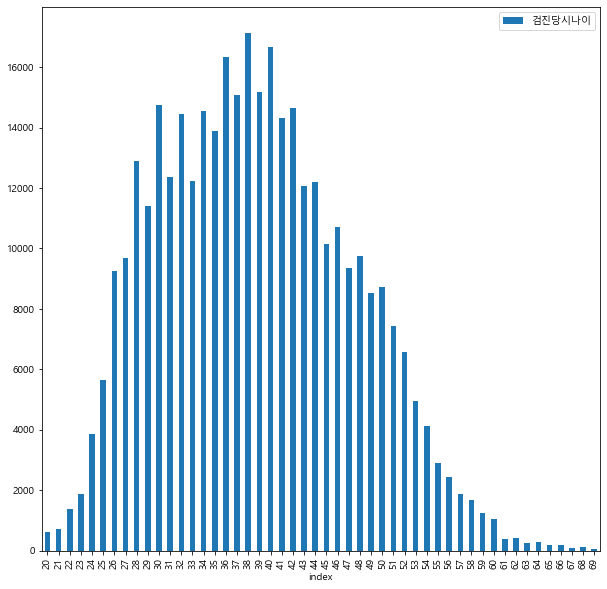

In [320]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [321]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,628
39,21,708
36,22,1373
33,23,1871
30,24,3844
27,25,5660
22,26,9251
20,27,9691
11,28,12887
16,29,11418


# 검진항목 시각화

In [322]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
count,366630.000000,3.666300e+05,3.666300e+05,366630.0,366630.000000,366630.000000,366630.000000,366630.000000,366630.000000,366630.000000,366630.000000,366630.000000,366630.000000
mean,2021.790309,4.940318e+05,1.477240e+06,2.0,38.708764,100.621935,0.706710,11.778307,99.523717,96.055034,98.016817,97.865165,99.122270
std,1.734456,3.658279e+05,8.103017e+05,0.0,8.525875,17.047581,0.121984,2.113180,52.603201,42.516039,52.388361,36.577863,18.392803
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,43.000000,0.250000,10.000000,0.000000,0.000000,0.040000,0.160000,50.000000
25%,2021.000000,2.154030e+05,6.477162e+05,2.0,32.000000,89.000000,0.600000,10.000000,47.480000,65.710000,50.730000,70.910000,86.000000
50%,2022.000000,3.696425e+05,1.387060e+06,2.0,38.000000,100.640000,0.700000,11.310000,100.000000,100.000000,100.000000,98.970000,100.000000
75%,2023.000000,8.229328e+05,2.177957e+06,2.0,45.000000,112.000000,0.800000,12.700000,150.440000,120.910000,141.470000,124.970000,113.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,147.000000,1.410000,21.000000,199.980000,200.000000,199.910000,197.890000,149.000000


<AxesSubplot:xlabel='검진당시나이'>

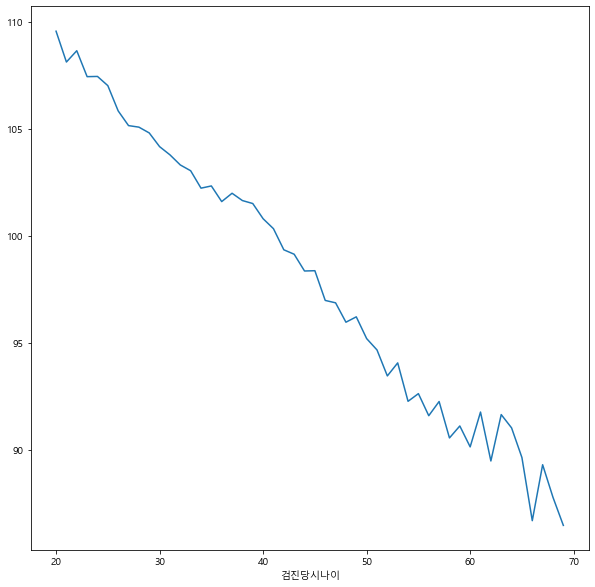

In [323]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

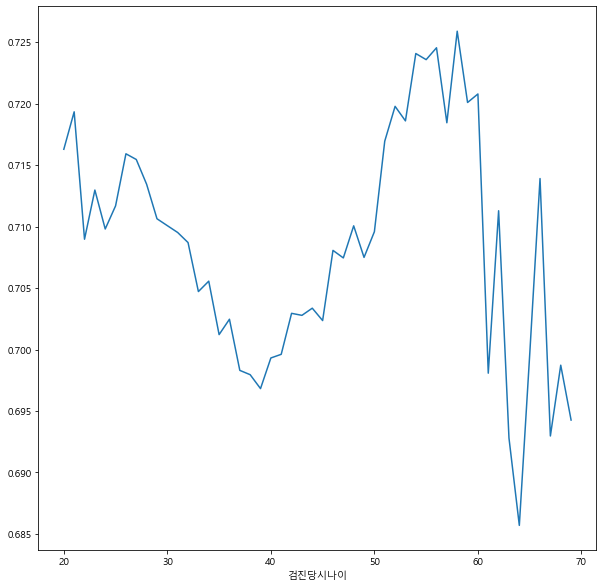

In [324]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

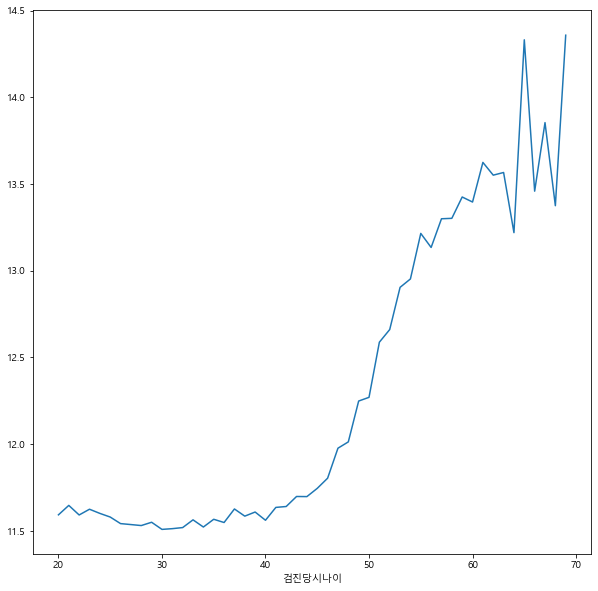

In [325]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

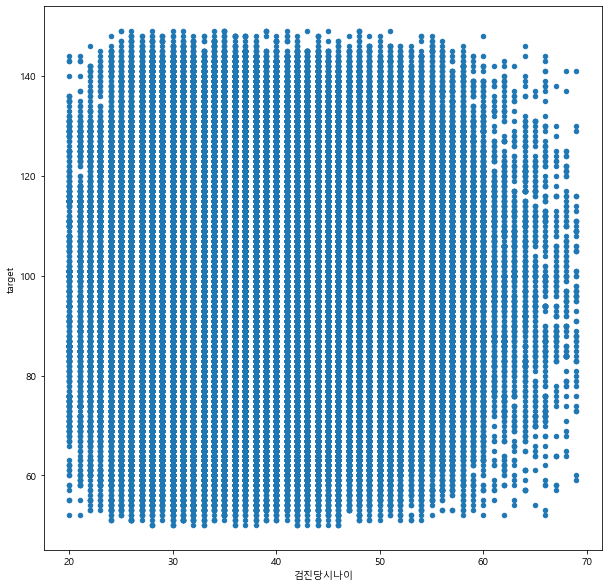

In [326]:
df_woman.plot.scatter(x='검진당시나이', y='target')

<AxesSubplot:xlabel='index'>

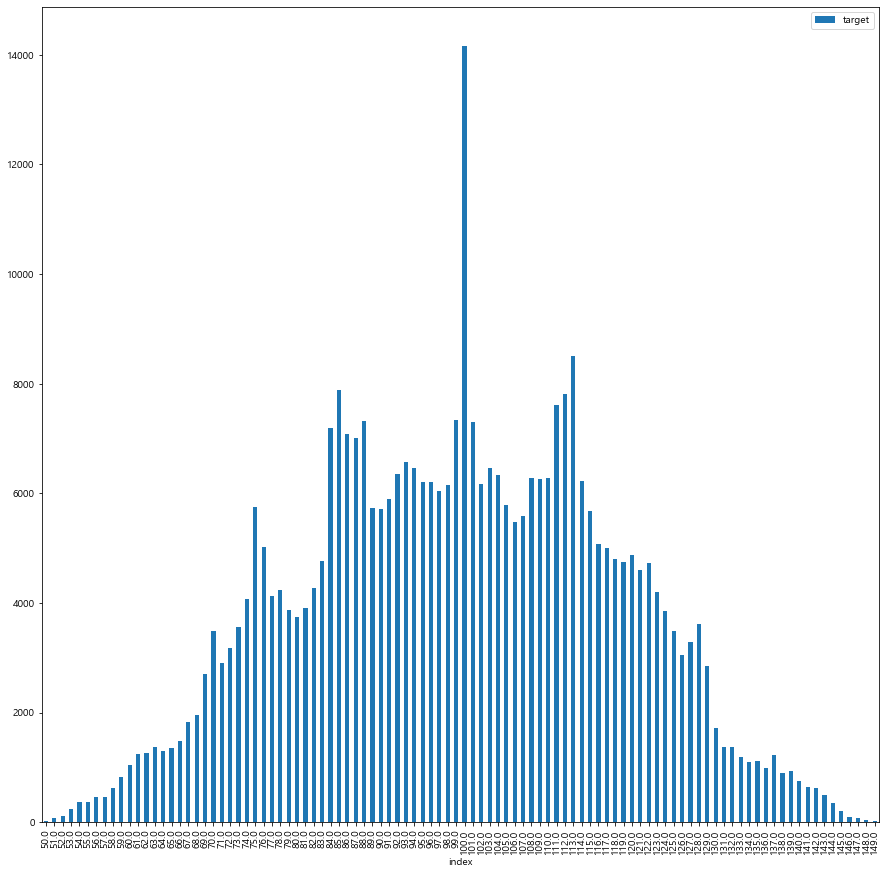

In [327]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

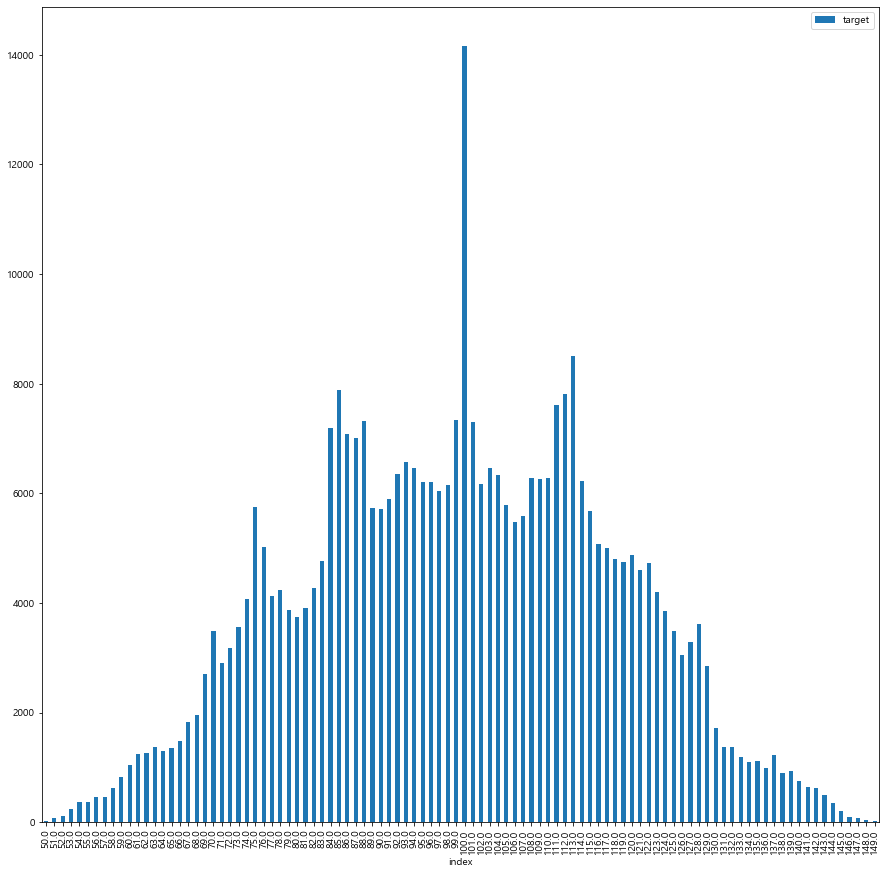

In [328]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [329]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
98,50.0,23
95,51.0,77
93,52.0,117
91,53.0,243
89,54.0,368
88,55.0,373
87,56.0,453
86,57.0,465
83,58.0,632
80,59.0,832


In [330]:
df_woman_sampling = pd.DataFrame()

for target in range(int(df_woman['target'].min()), 100):
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [331]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

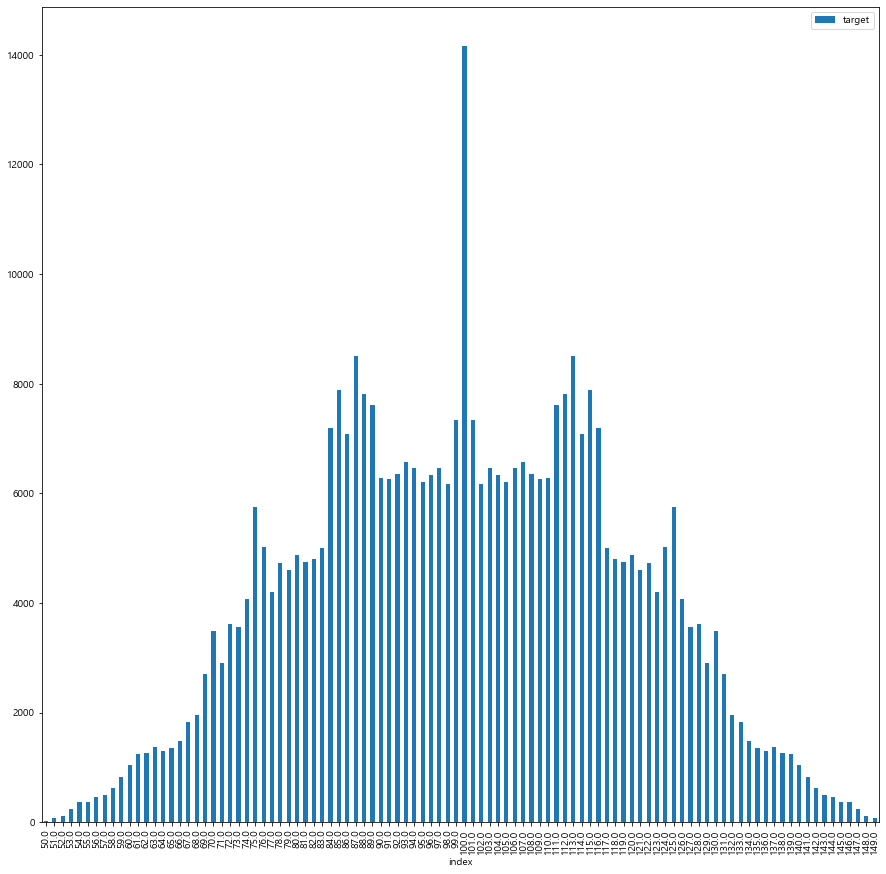

In [332]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [333]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
99,50.0,23
98,51.0,77
96,52.0,117
94,53.0,243
92,54.0,368
90,55.0,373
88,56.0,453
86,57.0,491
84,58.0,632
81,59.0,832


# 나이별 확인하기

In [334]:
# df_woman['검진당시나이'].value_counts()

In [335]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [336]:
# df_woman['검진당시나이'].min()

In [337]:
# df_woman['검진당시나이'].max()

In [338]:
# df_woman.columns

In [339]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [340]:
# df_temp.info()

In [341]:
# df_temp.reset_index(drop=True, inplace=True)

In [342]:
# df_woman = df_temp.copy()

In [343]:
# df_woman['검진당시나이'].value_counts()

In [344]:
# df_woman[df_woman['검진당시나이']==20]

In [345]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [346]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [347]:
train_columns

['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)']

In [348]:
# target_col = '검진당시나이'

In [349]:
target_col

'target'

## Min Max Scaling

In [350]:
from sklearn.preprocessing import MinMaxScaler

In [351]:
scaling_bool

True

In [352]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_sampling_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)
    
    data_scaler2 = scaler.fit_transform(df_woman[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler2, columns=train_columns)

## train_test_split

In [353]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [354]:
# model2 = LinearRegression()

In [355]:
# model2.fit(X_train2, y_train2)

In [356]:
# model2.intercept_

In [357]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [358]:
# model2 = XGBRegressor()

In [359]:
# # A parameter grid for XGBoost
# params = {
#     'n_estimators':[500],
# #     'min_child_weight':[4,5], 
# #     'gamma':[i/10.0 for i in range(3,6)],  
# #     'subsample':[i/10.0 for i in range(6,11)],
# #     'colsample_bytree':[i/10.0 for i in range(6,11)], 
# #     'max_depth': [2,3,4,6,7],
#     'objective': ['reg:squarederror', 'reg:tweedie'],
#     'booster': ['gbtree', 'gblinear'],
#     'eval_metric': ['rmse'],
#     'eta': [i/10.0 for i in range(3,6)],
# }

In [360]:
# # run randomized search
# n_iter_search = 10

# random_search = RandomizedSearchCV(model2, param_distributions=params,
#                                    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [361]:
# import time
# start = time.time()
# random_search.fit(X_train2, y_train2)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

In [362]:
# # best parameter
# random_search.best_params_

In [363]:
# # best score
# random_search.best_score_

In [364]:
# model2 = random_search.best_estimator_
# model2

## Keras

In [365]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [366]:
# model = build_model()

In [367]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [368]:
# model.summary()

In [369]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [370]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [371]:
# plot_history(history)

## pyTorch 신경망

In [372]:
np.shape(X_train)[1]

3

In [373]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [374]:
model2 = Regressor()
reg_loss2 = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
optimizer2 = optim.Adam(model2.parameters())

In [375]:
# epochs = 1000

In [376]:
X_train2  = torch.Tensor(X_train2.to_numpy())
X_test2  = torch.Tensor(X_test2.to_numpy())
y_train2  = torch.Tensor(y_train2.to_numpy().reshape(-1, 1))
y_test2  = torch.Tensor(y_test2.to_numpy().reshape(-1, 1))

In [377]:
import time
start = time.time()

losses2 = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(epochs):
    optimizer2.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred2 = model2(X_train2)          # 순전파 연산으로 예측값 계산
    loss = reg_loss2(y_pred2, y_train2)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer2.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 10번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

    # 손실 값을 리스트에 추가하여 추적
    losses2.append(loss.item())
    
end = time.time()
print(f"{end - start:.5f} sec")

Epoch    0/400 Cost: 10360.215820
Epoch   10/400 Cost: 10218.322266
Epoch   20/400 Cost: 9886.268555
Epoch   30/400 Cost: 9214.342773
Epoch   40/400 Cost: 8001.228027
Epoch   50/400 Cost: 6093.805664
Epoch   60/400 Cost: 3604.541748
Epoch   70/400 Cost: 1288.323608
Epoch   80/400 Cost: 409.716949
Epoch   90/400 Cost: 496.106537
Epoch  100/400 Cost: 355.075043
Epoch  110/400 Cost: 315.787048
Epoch  120/400 Cost: 286.745575
Epoch  130/400 Cost: 256.802185
Epoch  140/400 Cost: 234.287231
Epoch  150/400 Cost: 211.708374
Epoch  160/400 Cost: 191.291611
Epoch  170/400 Cost: 172.230103
Epoch  180/400 Cost: 154.880890
Epoch  190/400 Cost: 139.186676
Epoch  200/400 Cost: 125.185875
Epoch  210/400 Cost: 112.812424
Epoch  220/400 Cost: 102.011192
Epoch  230/400 Cost: 92.715218
Epoch  240/400 Cost: 84.838730
Epoch  250/400 Cost: 78.274139
Epoch  260/400 Cost: 72.895462
Epoch  270/400 Cost: 68.561531
Epoch  280/400 Cost: 65.123207
Epoch  290/400 Cost: 62.429893
Epoch  300/400 Cost: 60.337193
Epoch 

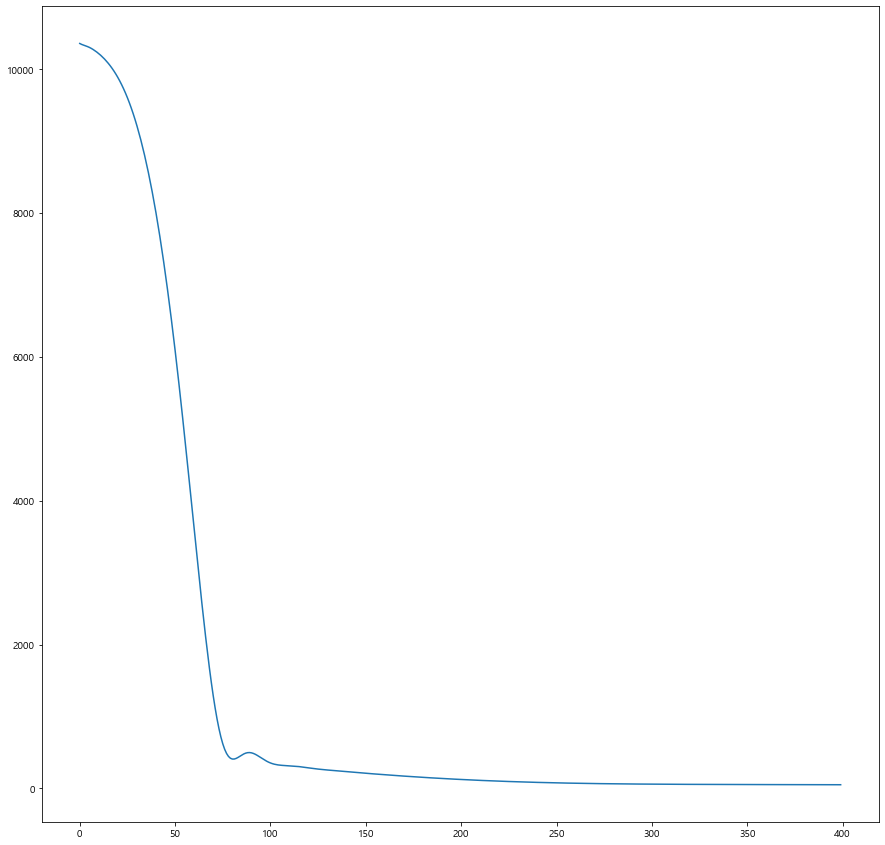

In [378]:
plt.plot(losses2)

## coef 계산

In [379]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [380]:
# df_coef2.columns = ['검사항목', 'coef']

In [381]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [382]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [383]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [384]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [385]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [386]:
# slr2 = LinearRegression()

In [387]:
# slr2.fit(X_train2_poly, y_train2)

In [388]:
# np.shape(X_train2)

In [389]:
# np.shape(X_train2_poly)

In [390]:
# np.shape(X_test2)

In [391]:
# np.shape(X_test2_poly)

In [392]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [393]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [394]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [395]:
# model_path2 = './model/03/11/20/best_estimator2.pkl'

In [396]:
# import pickle
# with open(model_path2,'wb') as f:
#     pickle.dump(model2, f)

In [397]:
# with open(model_path2, 'rb') as f:
#     model2 = pickle.load(f)

In [398]:
# Get predictions
# y_pred2 = model2.predict(X_test2)

# 성능 평가

## pyTorch 예측

In [399]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [400]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [401]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 5.667541
MSE : 52.1405
RMSE : 7.220838


In [402]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.8529791351577573

In [403]:
if XGB_bool:
    model2.score(X_test2, y_test2)

## feature importance

In [404]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2)

# 실제나이 - 예측나이 결과

In [405]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [406]:
df_test2.head()

,0,0
0,142.0,138.667038
1,129.0,123.211983
2,115.0,107.794350
3,103.0,112.879967
4,95.0,87.582588


In [407]:
df_test2.columns

Int64Index([0, 0], dtype='int64')

In [408]:
df_test2.columns = ['실제지수', '예측지수']

In [409]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [410]:
df_test2.head()

,실제지수,예측지수,diff
0,142.0,138.667038,-3.332962
1,129.0,123.211983,-5.788017
2,115.0,107.794350,-7.205650
3,103.0,112.879967,9.879967
4,95.0,87.582588,-7.417412


In [411]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [412]:
len(df_test2)

99073

In [413]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,142.0,138.667038,-3.332962,-3.0
1,129.0,123.211983,-5.788017,-6.0
2,115.0,107.794350,-7.205650,-7.0
3,103.0,112.879967,9.879967,10.0
4,95.0,87.582588,-7.417412,-7.0


<AxesSubplot:>

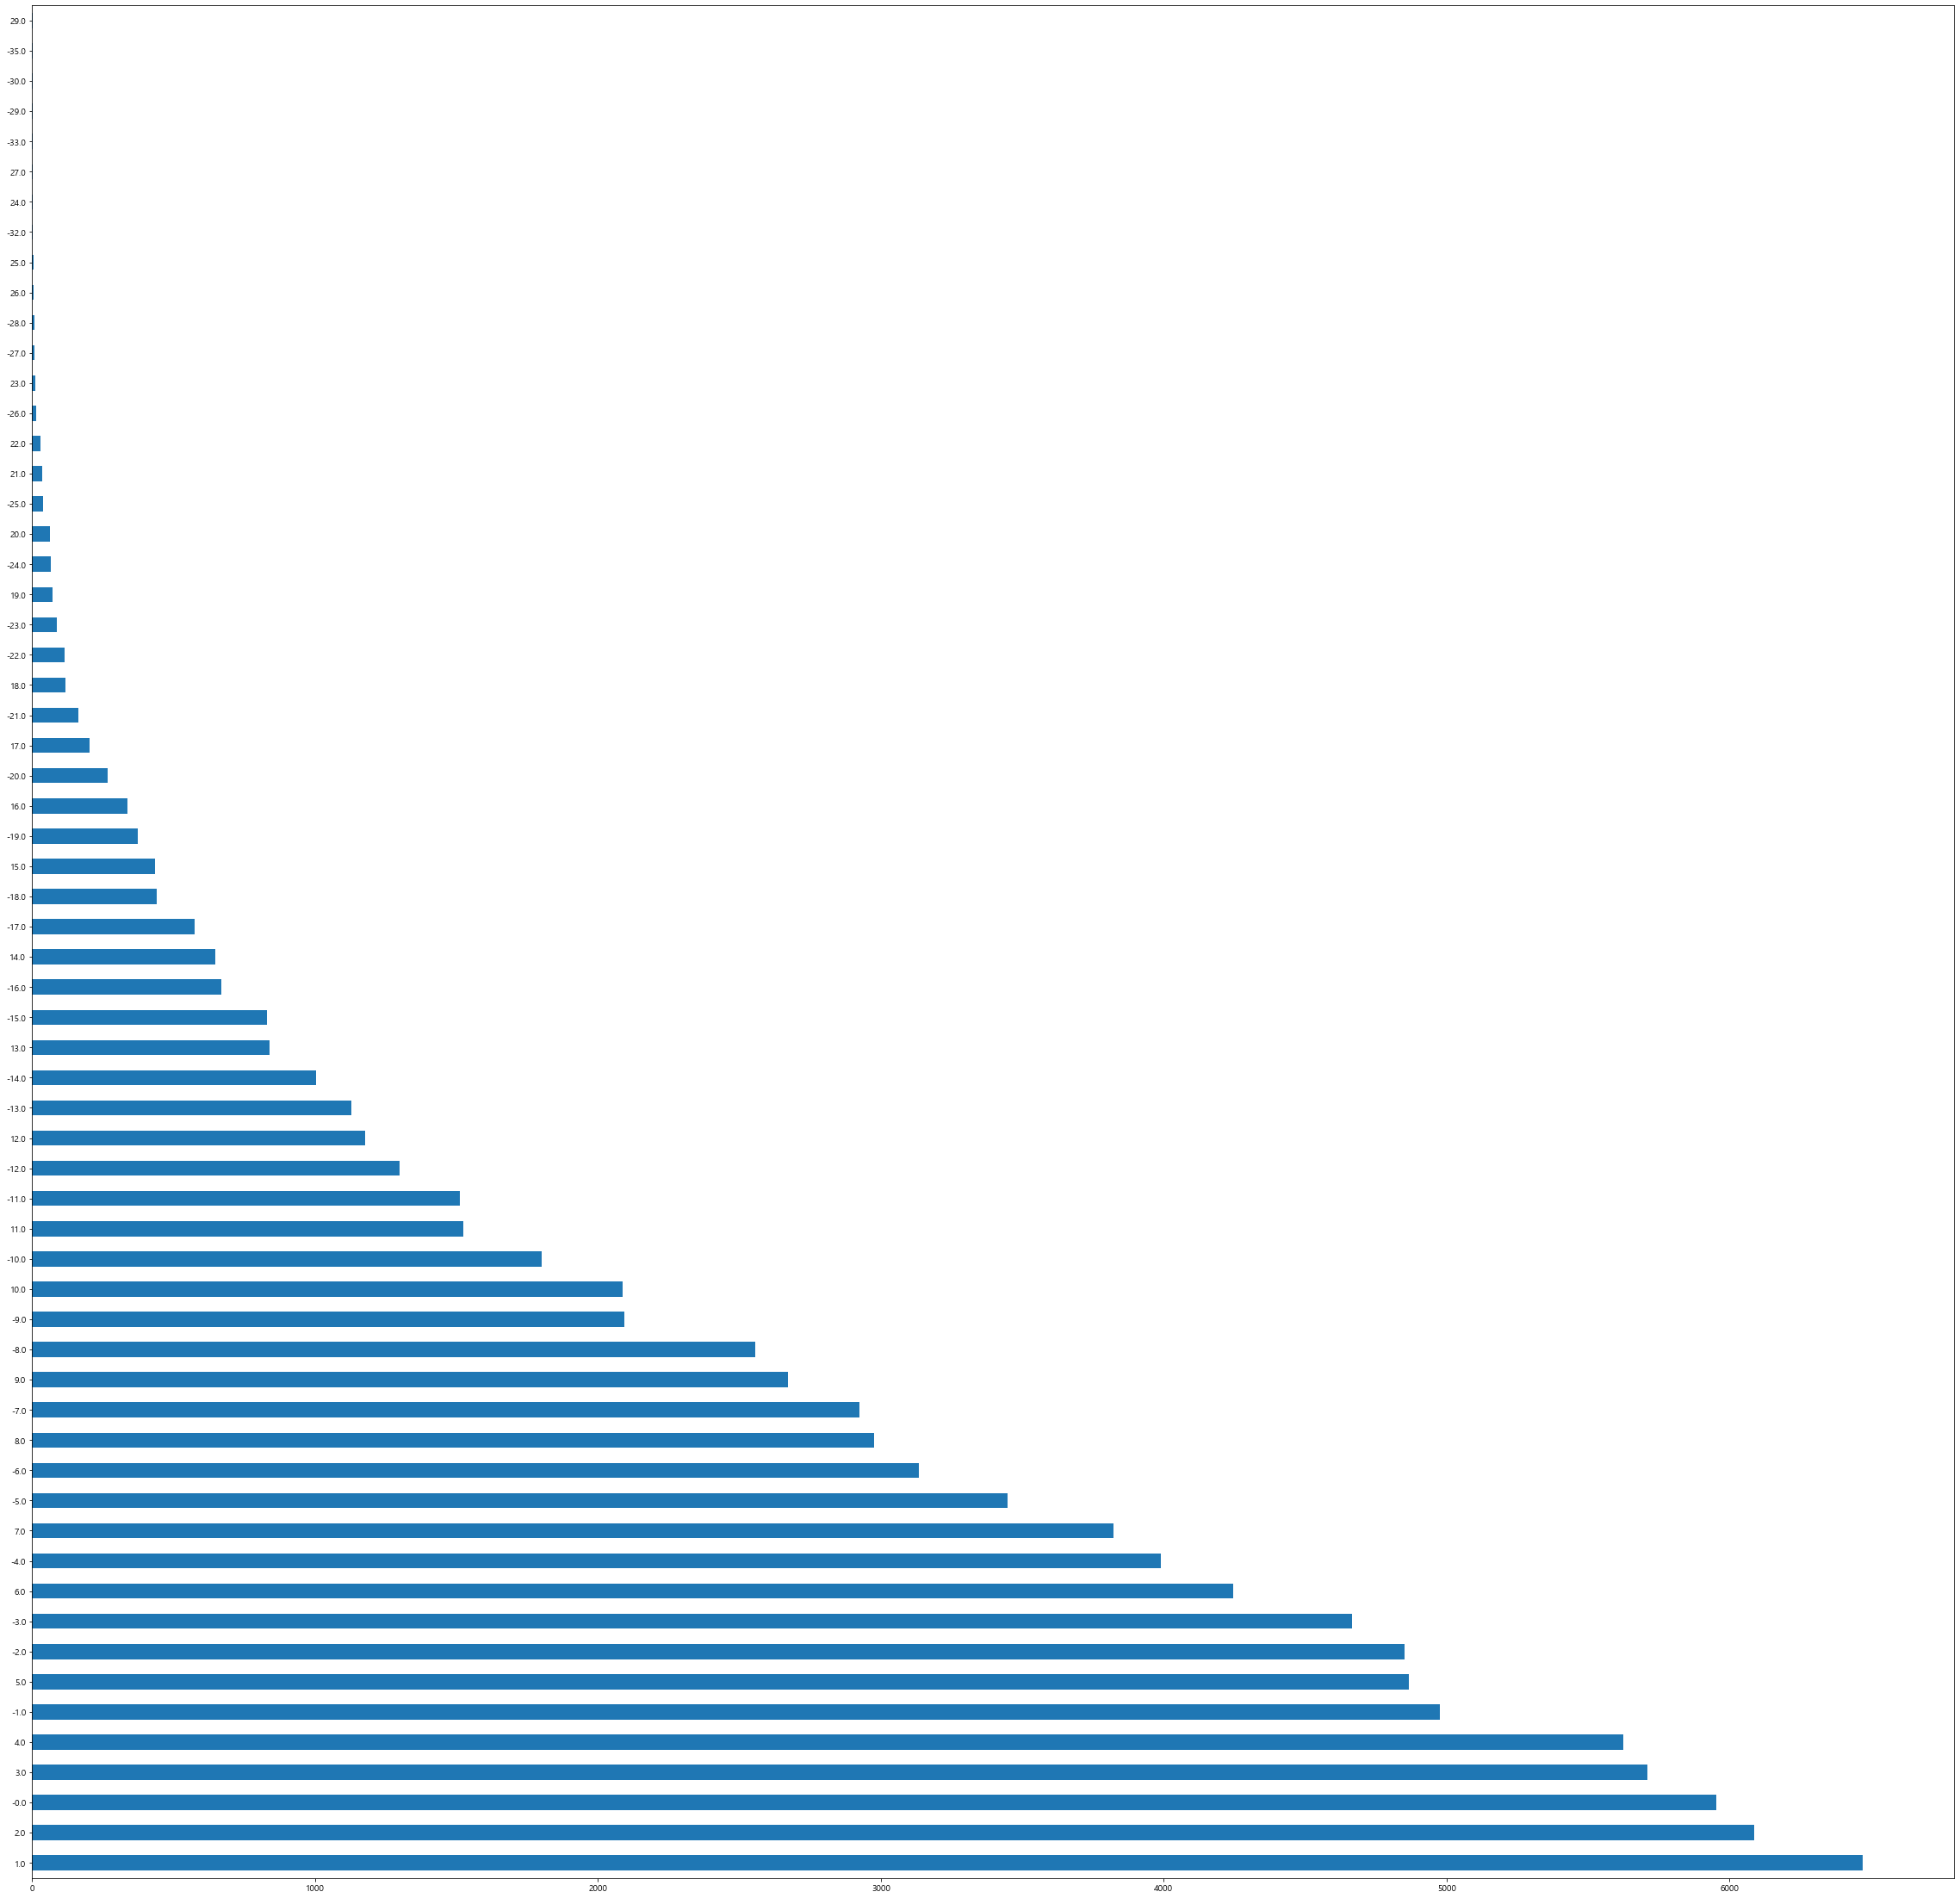

In [414]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [415]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2)

In [416]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [417]:
df_train2.round(0).value_counts()

106.0    10278
104.0     8823
108.0     7732
102.0     6953
91.0      6489
103.0     6397
101.0     6396
100.0     6065
105.0     6011
94.0      6000
97.0      5954
110.0     5849
88.0      5840
99.0      5700
98.0      5664
95.0      5560
93.0      5445
90.0      5438
85.0      5372
92.0      5266
107.0     5250
89.0      5218
96.0      5185
87.0      4982
81.0      4971
84.0      4923
109.0     4895
83.0      4783
86.0      4717
82.0      4270
119.0     4243
117.0     4102
79.0      4046
115.0     3960
114.0     3934
80.0      3900
123.0     3841
121.0     3830
118.0     3795
116.0     3774
77.0      3632
112.0     3621
111.0     3546
113.0     3512
78.0      3461
122.0     3451
75.0      3325
120.0     3289
76.0      3008
74.0      2804
124.0     2647
73.0      2411
72.0      2399
127.0     2335
125.0     2323
126.0     2234
71.0      2033
70.0      2016
69.0      1801
130.0     1717
129.0     1647
128.0     1628
68.0      1550
67.0      1457
66.0      1292
131.0     1206
133.0     

In [418]:
y_test2.value_counts()

100.0    3605
113.0    2142
87.0     2132
85.0     1988
112.0    1987
88.0     1944
89.0     1902
115.0    1902
111.0    1896
99.0     1837
116.0    1835
86.0     1827
101.0    1809
84.0     1796
114.0    1743
93.0     1698
107.0    1635
104.0    1619
108.0    1613
90.0     1595
110.0    1593
94.0     1592
103.0    1581
97.0     1579
95.0     1578
109.0    1578
96.0     1571
106.0    1569
102.0    1557
105.0    1549
98.0     1538
92.0     1537
91.0     1522
75.0     1453
125.0    1453
117.0    1270
120.0    1234
124.0    1231
79.0     1227
76.0     1226
83.0     1218
78.0     1214
122.0    1194
82.0     1185
118.0    1178
80.0     1175
121.0    1171
119.0    1151
81.0     1143
126.0    1030
77.0     1027
123.0    1020
74.0     1005
72.0      946
127.0     910
73.0      892
130.0     892
128.0     883
70.0      881
71.0      706
129.0     705
131.0     678
69.0      650
68.0      504
132.0     484
67.0      460
133.0     443
66.0      381
134.0     373
65.0      367
138.0     347
61.0  

In [419]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [420]:
df_plot.columns = ['count']

In [421]:
df_plot.reset_index(inplace=True)

In [422]:
df_plot = df_plot.sort_values(0, ascending=True)

In [423]:
df_plot.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

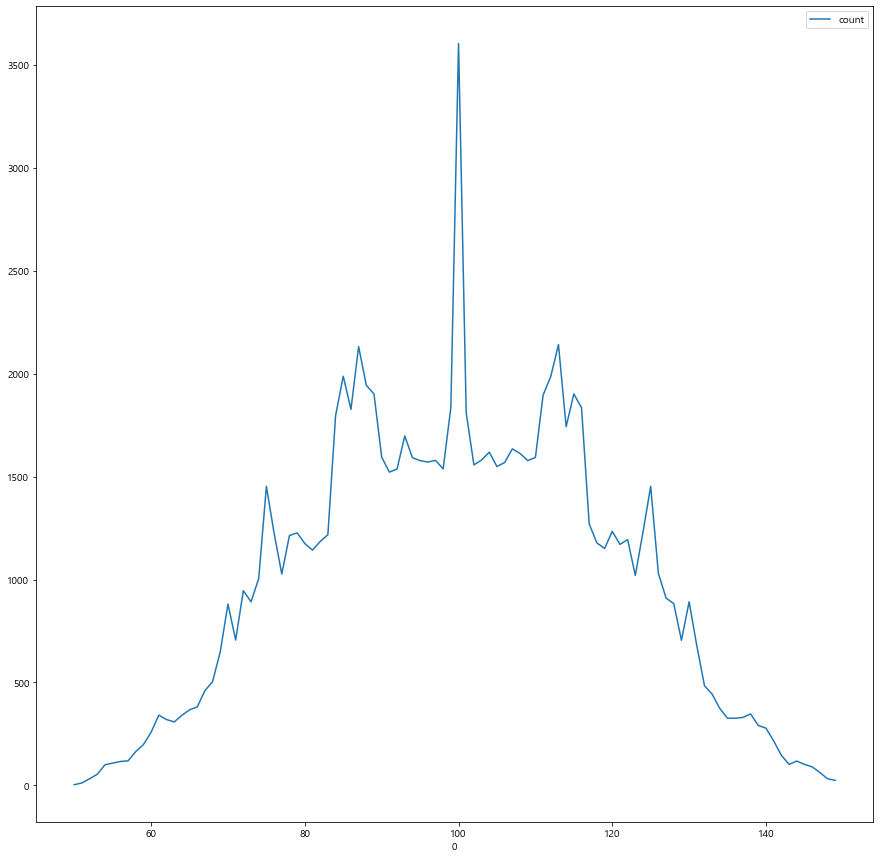

In [424]:
df_plot.plot()

In [425]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [426]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [427]:
df_test2.round(0).value_counts()

106.0    3392
104.0    3007
108.0    2502
102.0    2368
103.0    2236
91.0     2190
100.0    2114
101.0    2092
94.0     2002
105.0    1989
97.0     1986
110.0    1932
88.0     1922
98.0     1897
99.0     1896
85.0     1862
93.0     1821
95.0     1814
92.0     1792
107.0    1779
90.0     1770
96.0     1719
89.0     1690
87.0     1679
81.0     1625
109.0    1624
84.0     1583
86.0     1570
83.0     1559
119.0    1454
82.0     1442
117.0    1402
114.0    1312
79.0     1310
121.0    1304
80.0     1302
123.0    1296
115.0    1295
77.0     1227
118.0    1223
116.0    1197
112.0    1188
111.0    1183
113.0    1178
78.0     1165
75.0     1130
120.0    1123
122.0    1120
76.0      999
74.0      975
124.0     898
73.0      828
72.0      762
125.0     759
126.0     754
127.0     732
71.0      712
70.0      670
69.0      542
130.0     541
128.0     537
129.0     532
68.0      515
67.0      512
66.0      463
131.0     386
133.0     379
65.0      373
132.0     362
135.0     358
136.0     352
134.0 

In [428]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [429]:
df_plot2.columns = ['count']

In [430]:
df_plot2.reset_index(inplace=True)

In [431]:
df_plot2

,0,count
0,106.0,3392
1,104.0,3007
2,108.0,2502
3,102.0,2368
4,103.0,2236
5,91.0,2190
6,100.0,2114
7,101.0,2092
8,94.0,2002
9,105.0,1989


In [432]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [433]:
df_plot2.set_index(0, inplace=True)

In [434]:
df_plot2

,count
0,
54.0,2
55.0,2
56.0,17
57.0,14
58.0,39
59.0,59
60.0,69
61.0,106
62.0,163


<AxesSubplot:xlabel='0'>

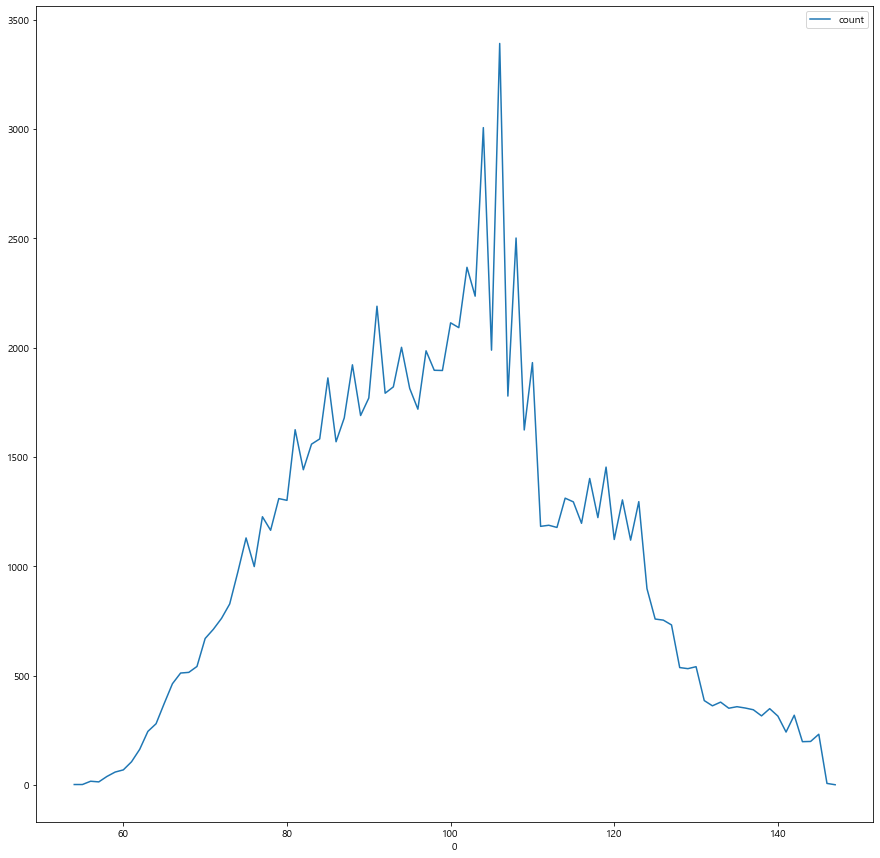

In [435]:
df_plot2.plot()

# 시각화

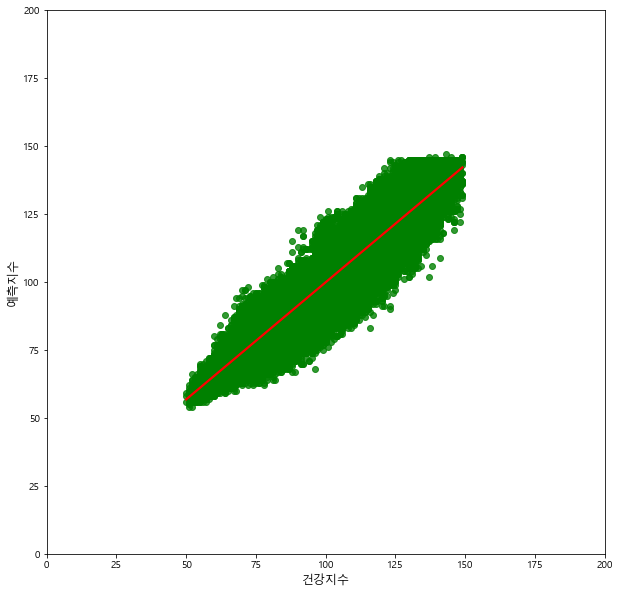

In [436]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()

# 여성 데이터 전체 계산

In [437]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
0,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0
1,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0
2,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0
3,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0
4,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0


In [438]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366630 entries, 0 to 366629
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   검진년도                   366630 non-null  int64  
 1   UID                    366630 non-null  int64  
 2   CU_REC_ID              366630 non-null  int64  
 3   SEX                    366630 non-null  int64  
 4   검진당시나이                 366630 non-null  int64  
 5   신사구체여과율 (GFR)          366630 non-null  float64
 6   크레아티닌(Creatinine)      366630 non-null  float64
 7   요소질소 (BUN)             366630 non-null  float64
 8   신사구체여과율 (GFR)_kde      366630 non-null  float64
 9   크레아티닌(Creatinine)_kde  366630 non-null  float64
 10  요소질소 (BUN)_kde         366630 non-null  float64
 11  kde_mean               366630 non-null  float64
 12  target                 366630 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 36.4 MB


In [439]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
79039,2021,196909,2495703,2,28,119.0,0.6,10.0,151.07,117.11,160.38,142.85,122.0
79040,2022,196909,2495702,2,29,118.0,0.6,10.8,154.81,122.63,101.31,126.25,113.0
79041,2023,196909,2495700,2,30,99.0,0.7,10.7,63.21,100.00,108.50,90.57,95.0
79042,2024,196909,2495697,2,31,123.0,0.6,10.7,157.70,118.11,102.08,125.96,113.0


In [440]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [441]:
len(df_pred2)

366630

In [442]:
df_pred2.reset_index(drop=True, inplace=True)

In [443]:
X_test2

tensor([[0.9135, 0.2174, 0.0000],
        [0.7885, 0.2174, 0.1191],
        [0.5542, 0.3130, 0.0000],
        ...,
        [0.5385, 0.3913, 0.3636],
        [0.8077, 0.3043, 0.1191],
        [0.5000, 0.3913, 0.0000]])

In [444]:
df_pred2.columns

Index(['신사구체여과율 (GFR)', '크레아티닌(Creatinine)', '요소질소 (BUN)'], dtype='object')

In [445]:
df_pred2[train_columns]

,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN)
0,0.721154,0.301724,0.119091
1,0.836538,0.215517,0.000000
2,0.574327,0.396552,0.000000
3,0.432692,0.474138,0.472727
4,0.567308,0.387931,0.000000
...,...,...,...
366625,0.538462,0.301724,0.119091
366626,0.528846,0.301724,0.119091
366627,0.567308,0.301724,0.000000
366628,0.759615,0.301724,0.119091


In [446]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [447]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [448]:
pred_data2

array([[115.958015],
       [132.72548 ],
       [107.73083 ],
       ...,
       [109.106316],
       [119.13018 ],
       [ 90.9552  ]], dtype=float32)

In [449]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [450]:
if scaling_bool:
#     df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)
    df_output2 = pd.concat([df_woman, df_output2['예측지수']], axis=1)

In [451]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수
0,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0,115.958015
1,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0,132.725479
2,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0,107.730827
3,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0,75.141869
4,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0,107.326790
5,2024,54,2750990,2,34,96.19,0.80,10.00,61.32,79.73,148.11,96.39,98.0,100.956253
6,2019,56,1605927,2,30,89.00,0.80,11.31,43.90,59.35,100.00,67.75,84.0,89.372414
7,2020,56,1605928,2,31,143.00,0.50,11.31,192.73,180.66,100.00,157.80,129.0,137.508347
8,2021,56,1605929,2,32,142.00,0.50,11.31,187.60,176.41,100.00,154.67,128.0,136.715607
9,2022,56,1351361,2,33,115.00,0.60,10.00,156.04,118.77,133.60,136.14,118.0,119.434326


## 예측지수 성능평가

In [452]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

5.601213655772759

# target으로 나이 계산

In [453]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [454]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
0,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0,115.958015,24.81
1,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0,132.725479,22.45
2,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0,107.730827,28.45
3,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0,75.141869,36.97
4,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0,107.326790,31.53
5,2024,54,2750990,2,34,96.19,0.80,10.00,61.32,79.73,148.11,96.39,98.0,100.956253,33.81
6,2019,56,1605927,2,30,89.00,0.80,11.31,43.90,59.35,100.00,67.75,84.0,89.372414,32.13
7,2020,56,1605928,2,31,143.00,0.50,11.31,192.73,180.66,100.00,157.80,129.0,137.508347,23.50
8,2021,56,1605929,2,32,142.00,0.50,11.31,187.60,176.41,100.00,154.67,128.0,136.715607,24.66
9,2022,56,1351361,2,33,115.00,0.60,10.00,156.04,118.77,133.60,136.14,118.0,119.434326,29.11


## 예측나이 성능평가

In [455]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.795392466519379

# 최종 산출

In [456]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
0,2023,53,2632764,2,28,118.00,0.60,11.31,153.52,117.11,100.00,123.54,112.0,115.958015,24.81
1,2024,53,2658222,2,29,130.00,0.50,10.00,173.97,178.29,150.90,167.72,134.0,132.725479,22.45
2,2020,54,497669,2,30,102.73,0.71,10.00,92.81,93.45,160.30,115.52,108.0,107.730827,28.45
3,2022,54,1319859,2,32,88.00,0.80,15.20,52.97,75.57,9.03,45.86,73.0,75.141869,36.97
4,2023,54,2039511,2,33,102.00,0.70,10.00,99.71,100.00,121.58,107.10,104.0,107.326790,31.53


In [457]:
# df_output2.to_csv('woman.csv')

# 최종 UID별 확인

In [458]:
# 성..
df_output2[df_output2['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
116380,2021,261581,2418910,2,50,106.0,0.6,10.0,154.57,124.96,165.57,148.37,125.0,112.278511,47.54
116381,2022,261581,2243878,2,51,105.0,0.6,15.6,160.15,128.43,39.30,109.29,105.0,88.336525,53.33
116382,2023,261581,2243877,2,52,105.0,0.6,10.0,147.81,118.49,190.88,152.39,127.0,111.483429,49.70
116383,2024,261581,2418911,2,53,104.0,0.6,12.5,157.52,122.46,107.87,129.28,115.0,99.523140,53.10


In [459]:
# 차..
df_output2[df_output2['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target,예측지수,예측나이
236236,2022,477944,2212776,2,31,117.0,0.6,11.5,155.73,118.11,81.09,118.31,109.0,114.314850,28.14
236237,2023,477944,2212775,2,32,97.0,0.7,13.5,58.39,100.00,20.45,59.61,80.0,87.695114,34.46
236238,2024,477944,2362855,2,33,84.0,0.9,13.7,34.18,28.82,32.18,31.73,66.0,74.810966,38.04


In [460]:
# df_output2.to_excel('./output/소화기능나이_여자.xlsx')
# df_output2.to_csv('./output/03_숙취나이_결측치제거_20대_여자.csv')

# 임의값 테스트

In [461]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
count,627263.000000,6.272630e+05,6.272630e+05,627263.0,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000,627263.000000
mean,2021.852067,5.102071e+05,1.493870e+06,1.0,41.923225,92.038918,0.967719,13.355222,100.321164,96.173600,97.954557,98.149776,99.269358
std,1.758806,3.647075e+05,8.088289e+05,0.0,8.822792,14.629402,0.144994,2.496077,53.901525,41.536677,52.474912,37.088914,18.650255
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,47.000000,0.270000,10.000000,0.010000,0.460000,1.100000,1.720000,51.000000
25%,2021.000000,2.224700e+05,6.608725e+05,1.0,35.000000,82.800000,0.880000,11.400000,48.470000,64.220000,48.030000,70.520000,85.000000
50%,2022.000000,3.816760e+05,1.418114e+06,1.0,41.000000,91.890000,0.970000,13.240000,100.000000,100.000000,100.000000,97.860000,99.000000
75%,2023.000000,8.385235e+05,2.191484e+06,1.0,49.000000,100.000000,1.090000,14.900000,156.720000,123.760000,141.980000,124.990000,113.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,147.000000,1.450000,21.030000,200.000000,200.000000,200.000000,199.050000,150.000000


In [462]:
df_man[:1]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,신사구체여과율 (GFR),크레아티닌(Creatinine),요소질소 (BUN),신사구체여과율 (GFR)_kde,크레아티닌(Creatinine)_kde,요소질소 (BUN)_kde,kde_mean,target
0,2011,32,11757,1,24,91.89,1.0,15.2,100.0,100.0,28.08,76.03,88.0


In [463]:
# df_outlier = pd.DataFrame(
#     [[1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2]],
#     columns=train_columns)

In [464]:
# model.predict(df_outlier)

In [465]:
# df_outlier2 = pd.DataFrame(
# #     [[524, 537, 168, 525, 156, 3, 0.2, 0.77]],
#     [[23, 21, 44, 20, 170, 1, 0.17, 0.4]],
#     columns=train_columns)

In [466]:
# model.predict(df_outlier)

In [467]:
# model.coef_

In [468]:
# (model.coef_[0] * 24) + (model.coef_[1] * 37) + (model.coef_[2] * 168) + (model.coef_[3] * 25) + (model.coef_[4] * 156) + (model.coef_[5] * 0.97) + (model.coef_[6] * 0.2) + (model.coef_[7] * 0.77) + model.intercept_